<Figure size 640x480 with 0 Axes>

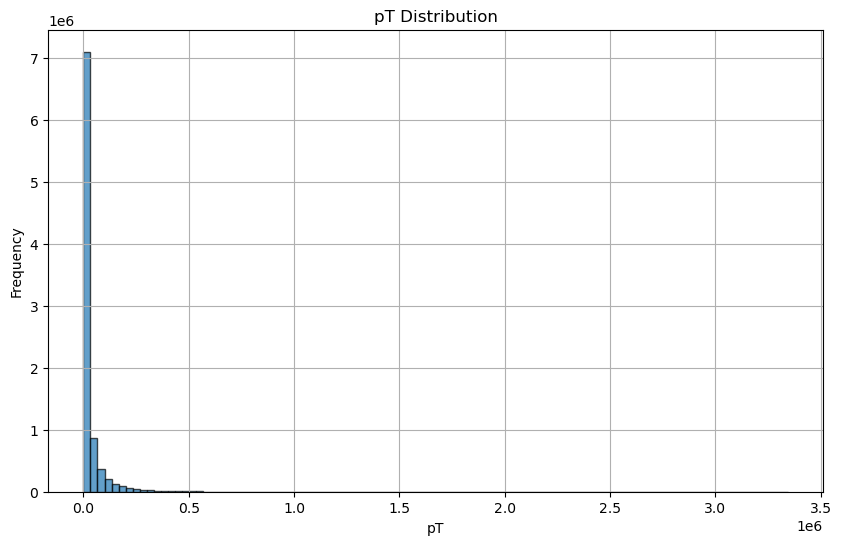

In [2]:
import h5py
import matplotlib.pyplot as plt

# Path to the .h5 file
#file_path = '/pscratch/sd/n/nishank/shapiro_pi2/salt/logs/GN2_20240701-T041601/ckpts/epoch=037-val_loss=0.60887__test_correct.h5'
#file_path = '/pscratch/sd/n/nishank/shapiro_pi2/GN2_fold0_20240226-T063759/ckpts/epoch=034-val_loss=0.57278__test_large.h5'
#file_path = '/global/cfs/cdirs/atlas/jmw464/nishank_pi2/upp_samples/large_mu_sample/output/pp_output_test_wjets_mul.h5'
file_path = '/pscratch/sd/n/nishank/shapiro_pi2/bvsc_data/pp_output_test_correct.h5'
#file_path = '/pscratch/sd/n/nishank/shapiro_pi2/bvsc_data/pp_output_test_large.h5'
# Open the .h5 file
with h5py.File(file_path, 'r') as file:
    # Access the pt data
    raw_pt_data = file["jets"]["pt"][:]
# Plot the pt distribution
plt.clf()
plt.figure(figsize=(10, 6))
plt.hist(raw_pt_data, bins=100, edgecolor='k', alpha=0.7)
plt.xlabel('pT')
plt.ylabel('Frequency')
plt.title('pT Distribution')
plt.grid(True)  # Save the plot as a .png file
plt.show()



<Figure size 640x480 with 0 Axes>

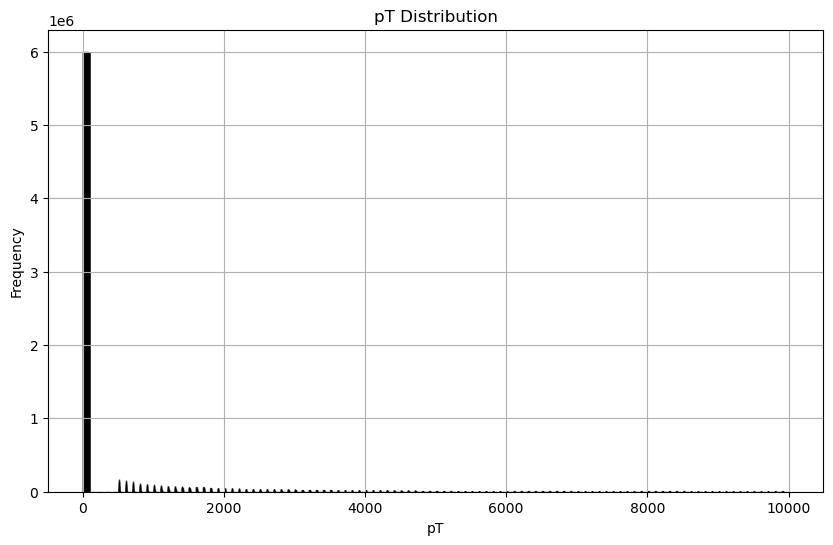

In [5]:
import h5py
import matplotlib.pyplot as plt

# Path to the .h5 file
#file_path = '/pscratch/sd/n/nishank/shapiro_pi2/salt/logs/GN2_20240701-T041601/ckpts/epoch=037-val_loss=0.60887__test_correct.h5'
#file_path = '/pscratch/sd/n/nishank/shapiro_pi2/GN2_fold0_20240226-T063759/ckpts/epoch=034-val_loss=0.57278__test_large.h5'
#file_path = '/global/cfs/cdirs/atlas/jmw464/nishank_pi2/upp_samples/large_mu_sample/output/pp_output_test_wjets_mul.h5'
file_path = '/pscratch/sd/n/nishank/shapiro_pi2/bvsc_data/pp_output_test_correct.h5'
#file_path = '/pscratch/sd/n/nishank/shapiro_pi2/bvsc_data/pp_output_test_large.h5'
# Open the .h5 file
with h5py.File(file_path, 'r') as file:
    # Access the pt data
    raw_pt_data = file["tracks"]["pt"][:]
# Plot the pt distribution
plt.clf()
plt.figure(figsize=(10, 6))
plt.hist(raw_pt_data, range=(0,10000), bins=100, edgecolor='k', alpha=0.7)
plt.xlabel('pT')
plt.ylabel('Frequency')
plt.title('pT Distribution')
plt.grid(True)  # Save the plot as a .png file
plt.show()



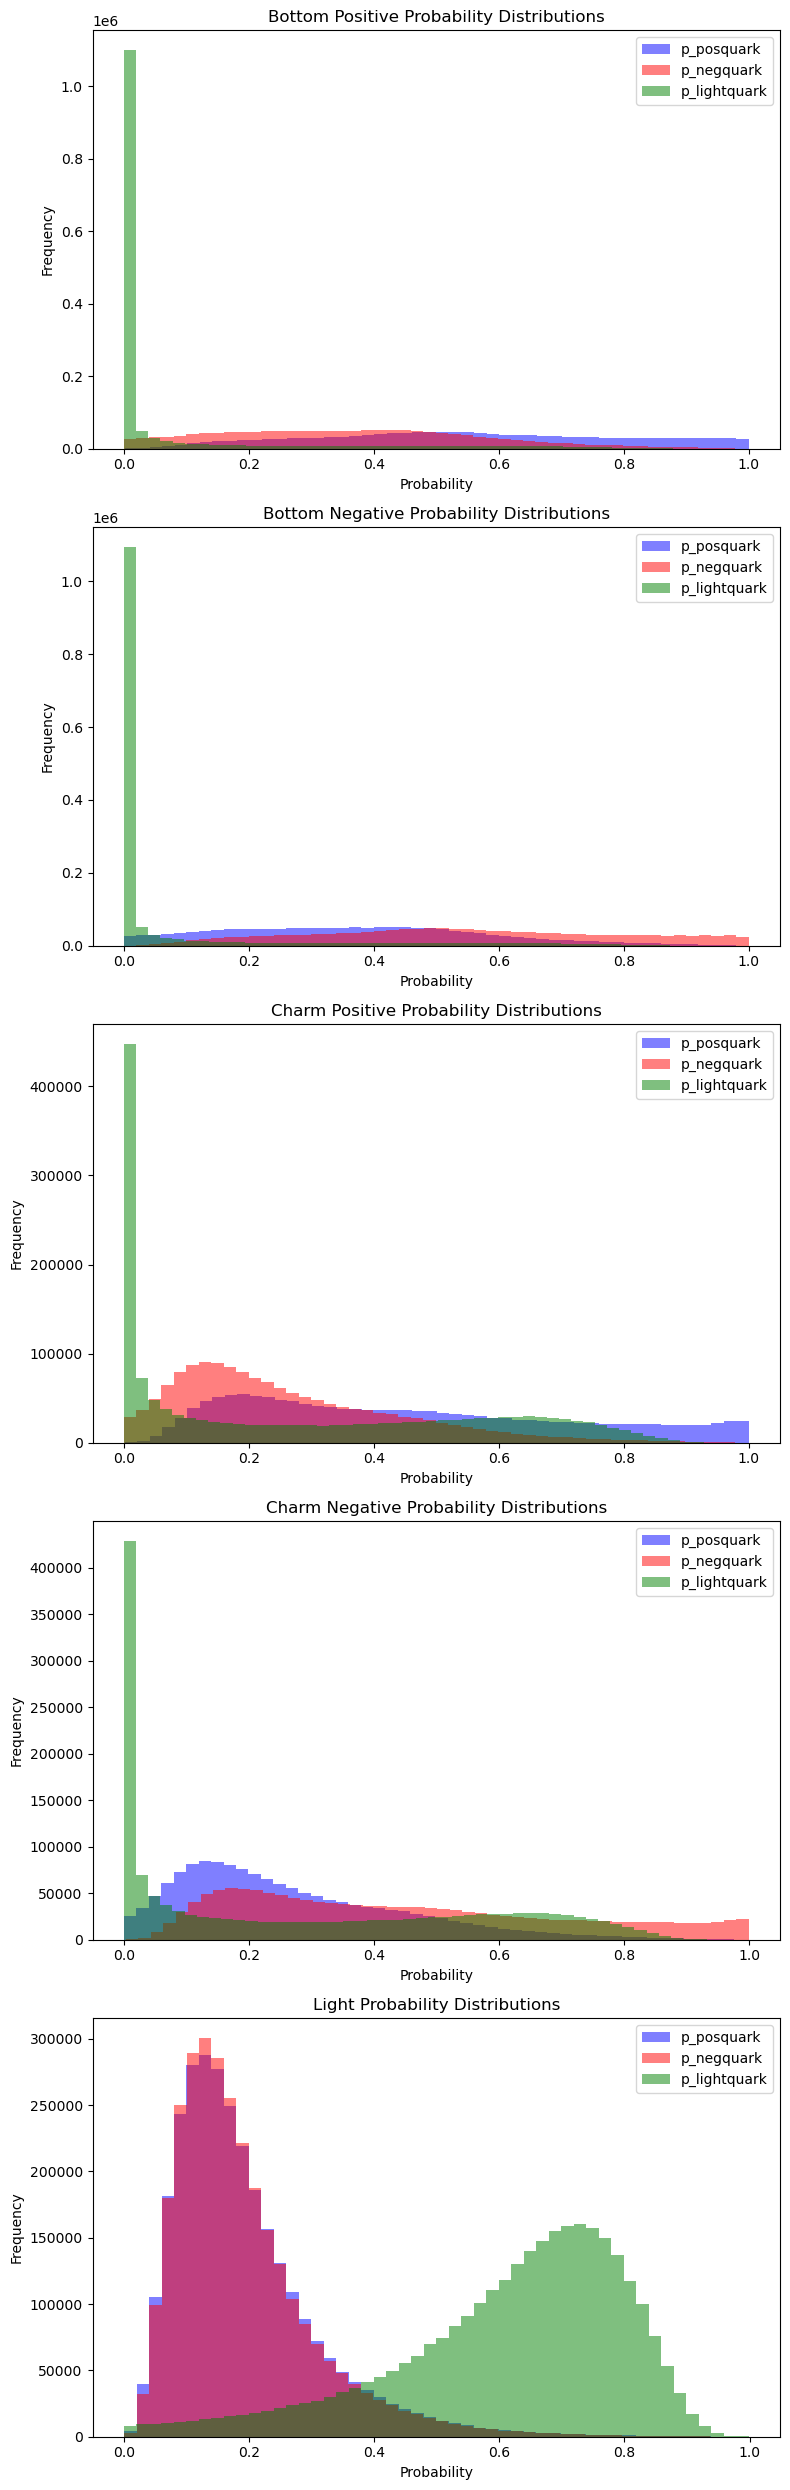

In [4]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Load the data
file_path = '/pscratch/sd/n/nishank/shapiro_pi2/salt/logs/4_20240824-T135642/ckpts/epoch=037-val_loss=0.60989__test_90M_final_testing.h5'

with h5py.File(file_path, 'r') as file:
    p_negquark = file["jets"]["p_negquark"][:]
    # print('bot', file["jets"]["GN2_charge_reco_pb"][100000:100100])
    # print('charm', file["jets"]["GN2_charge_reco_pc"][100000:100100])
    # print('light', file["jets"]["GN2_charge_reco_pu"][100000:100100])
    #print(file["jets"]["flavour_label"][200000:200100])
    p_lightquark = file["jets"]["p_lightquark"][:]
    #print('lights', file["jets"]["p_lightquark"][100000:101000])
    #print('p_negquark', file["jets"]["p_negquark"][200000:201000])
    p_posquark = file["jets"]["p_posquark"][:]
    #print('p_posquark',file["jets"]["p_posquark"][200000:201000])
    quark_label = file["jets"]["flavour_label"][:]  # Truth labels for quarks
    quark_charge = file["jets"]["quarkCharge"][:]
    #print('quarkCharge label', file["jets"]["quarkCharge"][200000:201000])# Charge labels for quarks

# Adjusted label values based on the information:
# 0 = bottom quarks, 1 = charm quarks, 2 = light quarks
bottom_label_value = 0
charm_label_value = 1
light_label_value = 2
positive_charge_value = 1
negative_charge_value = -1 

mask_bottom_pos = (quark_label == bottom_label_value) & (quark_charge == positive_charge_value)
mask_bottom_neg = (quark_label == bottom_label_value) & (quark_charge == negative_charge_value)
mask_charm_pos = (quark_label == charm_label_value) & (quark_charge == positive_charge_value)
mask_charm_neg = (quark_label == charm_label_value) & (quark_charge == negative_charge_value)
mask_light = (quark_label == light_label_value)

fig, axs = plt.subplots(5, 1, figsize=(8, 25))
categories = [
    ('Bottom Positive', mask_bottom_pos),
    ('Bottom Negative', mask_bottom_neg),
    ('Charm Positive', mask_charm_pos),
    ('Charm Negative', mask_charm_neg),
    ('Light', mask_light)
]

for i, (label, mask) in enumerate(categories):
    axs[i].hist(p_posquark[mask], bins=50, alpha=0.5, label='p_posquark', color='blue')
    axs[i].hist(p_negquark[mask], bins=50, alpha=0.5, label='p_negquark', color='red')
    axs[i].hist(p_lightquark[mask], bins=50, alpha=0.5, label='p_lightquark', color='green')
    
    axs[i].set_title(f'{label} Probability Distributions')
    axs[i].set_xlabel('Probability')
    axs[i].set_ylabel('Frequency')
    axs[i].legend(loc='upper right')

plt.tight_layout()
plt.show()


In [1]:
import h5py
file_path = "/pscratch/sd/n/nishank/shapiro_pi2/GN2_fold0_20240226-T063759/ckpts/epoch=034-val_loss=0.57278__test_test.h5"
with h5py.File(file_path, 'r') as file:
    print(file["jets"].dtype)

[('SV1_correctSignificance3d', '<f4'), ('softMuon_pt', '<f4'), ('softMuon_dR', '<f4'), ('softMuon_eta', '<f4'), ('softMuon_phi', '<f4'), ('softMuon_qOverPratio', '<f4'), ('softMuon_momentumBalanceSignificance', '<f4'), ('softMuon_scatteringNeighbourSignificance', '<f4'), ('softMuon_pTrel', '<f4'), ('softMuon_ip3dD0', '<f4'), ('softMuon_ip3dZ0', '<f4'), ('softMuon_ip3dD0Significance', '<f4'), ('softMuon_ip3dZ0Significance', '<f4'), ('softMuon_ip3dD0Uncertainty', '<f4'), ('softMuon_ip3dZ0Uncertainty', '<f4'), ('JetFitterFlip_energyFraction', '<f4'), ('JetFitterFlip_mass', '<f4'), ('JetFitterFlip_significance3d', '<f4'), ('JetFitterFlip_deltaphi', '<f4'), ('JetFitterFlip_deltaeta', '<f4'), ('JetFitterFlip_massUncorr', '<f4'), ('JetFitterFlip_dRFlightDir', '<f4'), ('pt_btagJes', '<f4'), ('eta_btagJes', '<f4'), ('absEta_btagJes', '<f4'), ('scalarSumTrackPt', '<f4'), ('JetFitter_energyFraction', '<f4'), ('JetFitter_mass', '<f4'), ('JetFitter_significance3d', '<f4'), ('JetFitter_deltaphi', '<

In [17]:
import h5py
import numpy as np

# Load the HDF5 file
file_path = '/pscratch/sd/n/nishank/shapiro_pi2/salt/logs/4_20240817-T141719/ckpts/epoch=076-val_loss=0.00000__test_pp_output_test_wjets_muc.h5'
with h5py.File(file_path, 'r') as file:
    # Extract the quarkCharge data
    quark_charge = file['jets']['quarkCharge'][:]

# Find the unique values and count their occurrences
unique_values, counts = np.unique(quark_charge, return_counts=True)
for value, count in zip(unique_values, counts):
    print(f"Value {value}: {count} occurrences")


Value -1: 1477697 occurrences
Value 0: 3 occurrences
Value 1: 1522300 occurrences


[-1  1]


/tmp/ipykernel_89521/1113240670.py:32: RuntimeWarning: divide by zero encountered in divide
  plt.plot(tpr, 1 / fpr, color='darkorange', lw=2, label=f'Primary Task ROC curve (AUC = {roc_auc:.2f})')
/tmp/ipykernel_89521/1113240670.py:33: RuntimeWarning: divide by zero encountered in divide
  plt.plot(tpr_aux, 1 / fpr_aux, color='blue', lw=2, label=f'Aux Task ROC curve (AUC = {roc_auc_aux:.2f})')


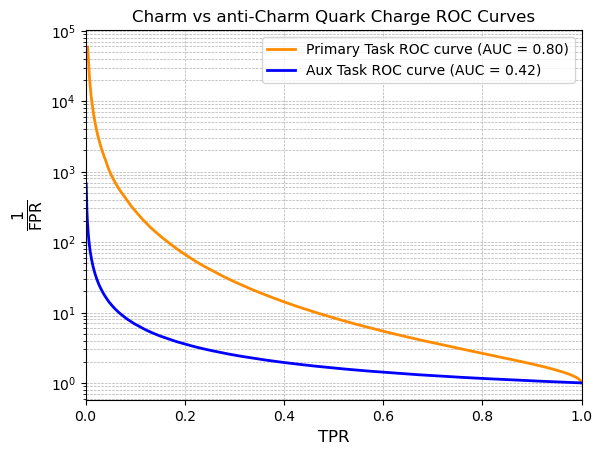

In [27]:
import h5py
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Load the HDF5 file
file_path = '/pscratch/sd/n/nishank/shapiro_pi2/salt/logs/4_20240817-T141719/ckpts/epoch=076-val_loss=0.00000__test_pp_output_test_wjets_muc.h5'
with h5py.File(file_path, 'r') as file:
    # Extract the data
    quark_charge = file['jets']['quarkCharge'][:]  # -1, 0, or +1
    p_negquark = file['jets']['p_negquark'][:]  # Probability of being negative
    p_posquark = file['jets']['p_posquark'][:]  # Probability of being positive

# Filter out occurrences where quarkCharge is 0
valid_indices = quark_charge != 0
quark_charge = quark_charge[valid_indices]
p_negquark = p_negquark[valid_indices]
p_posquark = p_posquark[valid_indices]
print(np.unique(quark_charge))
# Convert quarkCharge from -1 to 0 for the negative class
quark_labels = np.where(quark_charge == -1, 0, 1)

# Use p_posquark as the predicted probabilities for the positive class (label 1)
predicted_probabilities = p_posquark

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(quark_labels, predicted_probabilities)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(tpr, 1 / fpr, color='darkorange', lw=2, label=f'Primary Task ROC curve (AUC = {roc_auc:.2f})')
plt.plot(tpr_aux, 1 / fpr_aux, color='blue', lw=2, label=f'Aux Task ROC curve (AUC = {roc_auc_aux:.2f})')
plt.xlim([0.0, 1.0])
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.yscale('log')
plt.xlabel(r'$\text{TPR}$', fontsize=12)
plt.ylabel(r'$\frac{1}{\text{FPR}}$', fontsize=16)
plt.title('Charm vs anti-Charm Quark Charge ROC Curves')
plt.legend(loc="upper right")
plt.show()


Classification Accuracy for D+ Meson: 0.7925
Classification Accuracy for D0 Meson: 0.6917
Classification Accuracy for D_s Meson: 0.7560
Classification Accuracy for Charmed Baryons: 0.6937


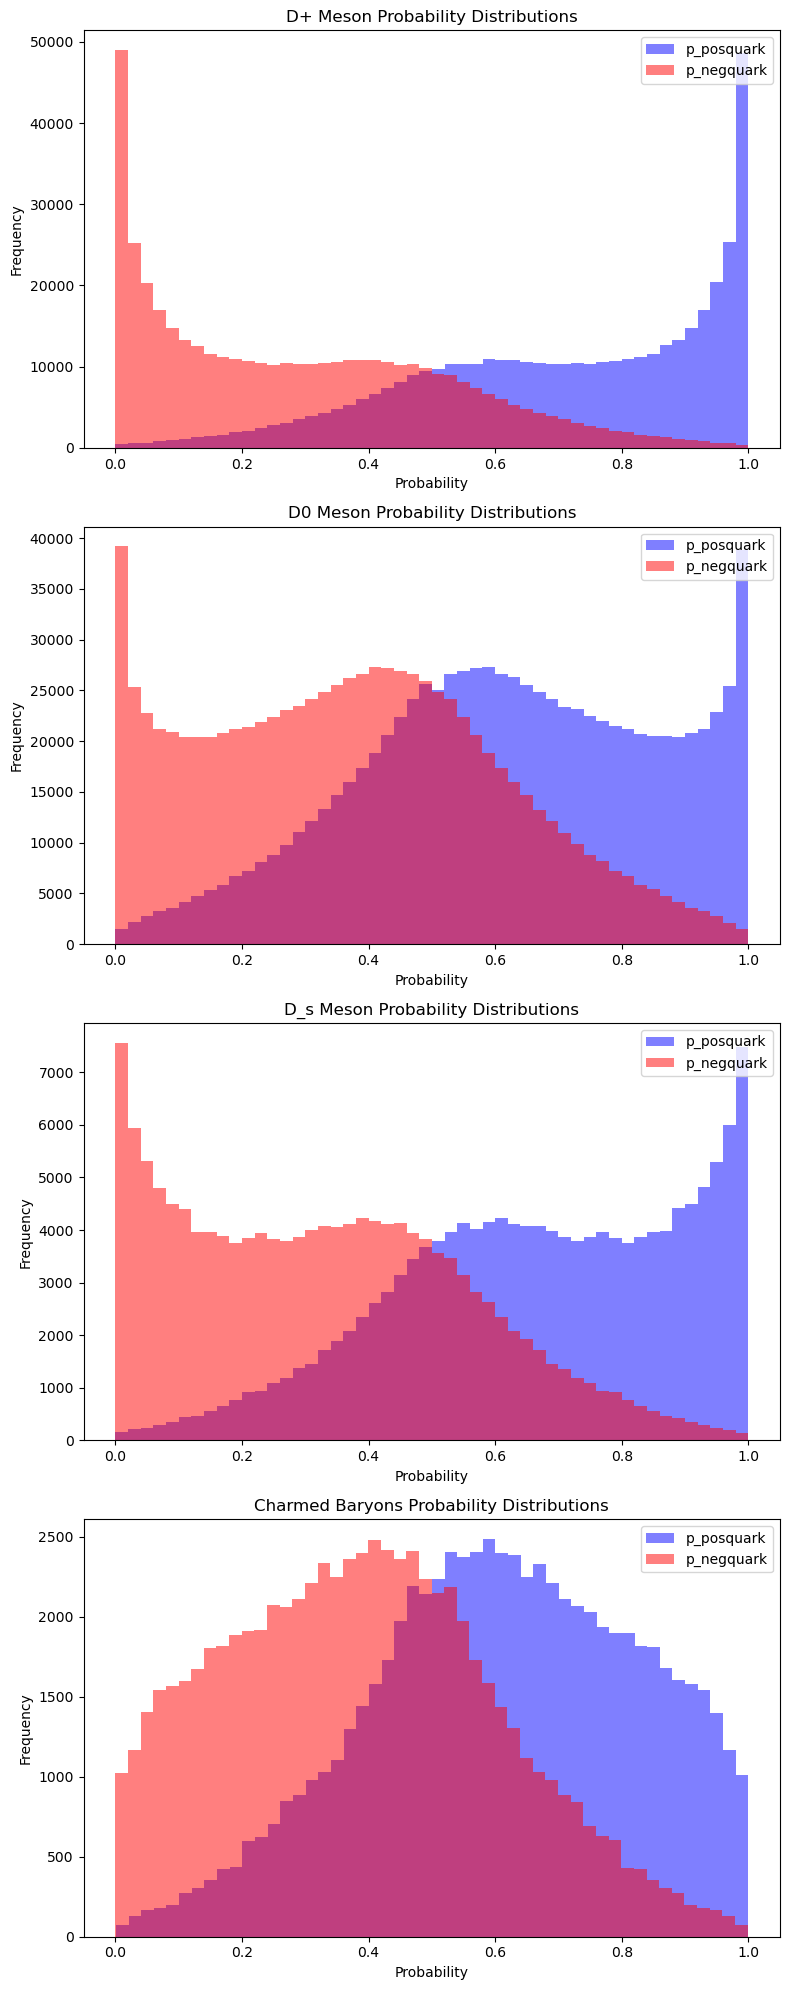

In [35]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Load the data
file_path = '/pscratch/sd/n/nishank/shapiro_pi2/salt/logs/4_20240817-T141719/ckpts/epoch=076-val_loss=0.00000__test_pp_output_test_wjets_muc.h5'

with h5py.File(file_path, 'r') as file:
    p_negquark = file["jets"]["p_negquark"][:]
    p_posquark = file["jets"]["p_posquark"][:]
    pdg_id = file["jets"]["HadronConeExclTruthLabelPdgId"][:]
    quark_charge = file["jets"]["quarkCharge"][:]  # True charge labels

# Define PDG IDs for the particles of interest
d_plus_pdg = 411
d_zero_pdg = 421
d_s_pdg = 431

# Charmed baryons PDG IDs from the images
charmed_baryons_pdg = [
    4122, 4222, 4212, 4112, 4224, 4214, 4114, 4232, 4132, 4322, 4312, 4324, 
    4314, 4332, 4334, 4412, 4422, 4414, 4424, 4432, 4434, 4444
]

# Create masks for each particle category
mask_d_plus = (pdg_id == d_plus_pdg)
mask_d_zero = (pdg_id == d_zero_pdg)
mask_d_s = (pdg_id == d_s_pdg)
mask_charmed_baryons = np.isin(pdg_id, charmed_baryons_pdg)

# Define the categories for plotting and accuracy calculation
categories = [
    ('D+ Meson', mask_d_plus),
    ('D0 Meson', mask_d_zero),
    ('D_s Meson', mask_d_s),
    ('Charmed Baryons', mask_charmed_baryons)
]

# Plot the probability distributions and calculate accuracy
fig, axs = plt.subplots(len(categories), 1, figsize=(8, 20))

for i, (label, mask) in enumerate(categories):
    # Plot histograms
    axs[i].hist(p_posquark[mask], bins=50, alpha=0.5, label='p_posquark', color='blue')
    axs[i].hist(p_negquark[mask], bins=50, alpha=0.5, label='p_negquark', color='red')
    axs[i].set_title(f'{label} Probability Distributions')
    axs[i].set_xlabel('Probability')
    axs[i].set_ylabel('Frequency')
    axs[i].legend(loc='upper right')

    # Classification based on probabilities
    predictions = np.where(p_posquark[mask] > p_negquark[mask], 1, -1)  # 1 for positive, -1 for negative
    true_labels = quark_charge[mask]  # True charge labels

    # Calculate accuracy
    accuracy = np.mean(predictions == true_labels)
    print(f'Classification Accuracy for {label}: {accuracy:.4f}')

plt.tight_layout()
plt.show()


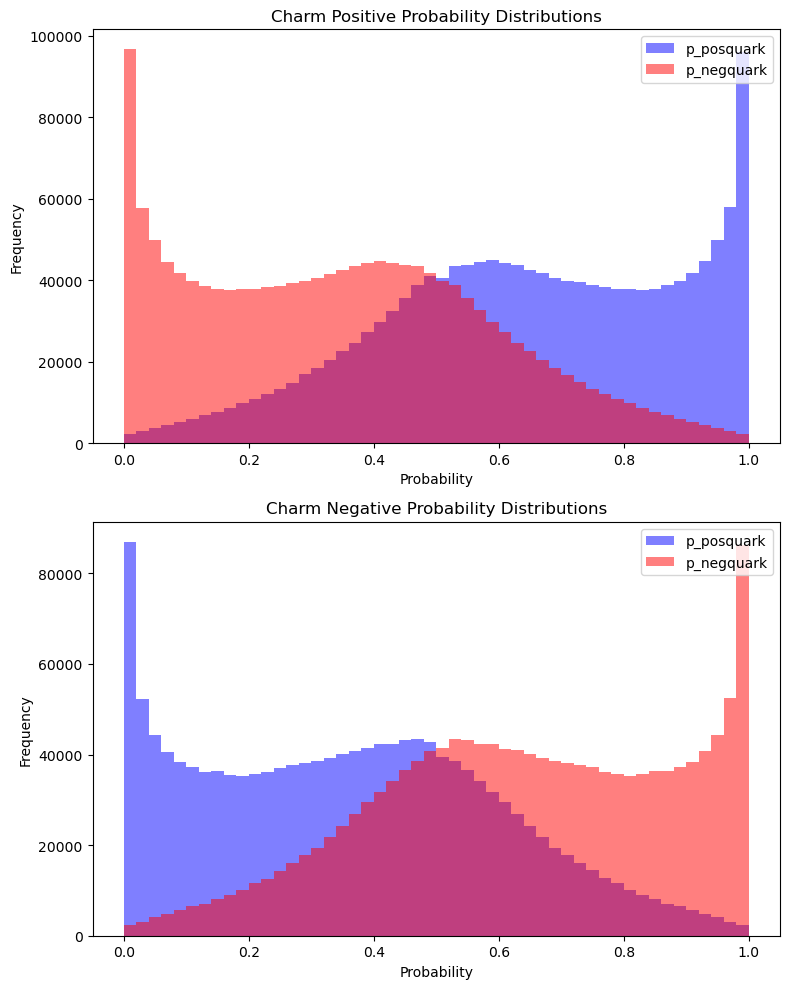

Overall Classification Accuracy for Charm Quarks: 0.7158


In [30]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Load the data
file_path = '/pscratch/sd/n/nishank/shapiro_pi2/salt/logs/4_20240817-T141719/ckpts/epoch=076-val_loss=0.00000__test_pp_output_test_wjets_muc.h5'

with h5py.File(file_path, 'r') as file:
    p_negquark = file["jets"]["p_negquark"][:]
    p_posquark = file["jets"]["p_posquark"][:]
    quark_label = file["jets"]["flavour_label"][:]  # Truth labels for quarks
    quark_charge = file["jets"]["quarkCharge"][:]   # Charge labels for quarks

# Adjusted label values based on the information:
# 0 = bottom quarks, 1 = charm quarks, 2 = light quarks
charm_label_value = 0  # Assuming charm quarks have label 1
positive_charge_value = 1
negative_charge_value = -1 

# Mask for charm quarks (both positive and negative)
mask_charm = (quark_label == charm_label_value)

# Plotting histograms for charm-positive and charm-negative jets
fig, axs = plt.subplots(2, 1, figsize=(8, 10))
categories = [
    ('Charm Positive', mask_charm & (quark_charge == positive_charge_value)),
    ('Charm Negative', mask_charm & (quark_charge == negative_charge_value))
]

for i, (label, mask) in enumerate(categories):
    axs[i].hist(p_posquark[mask], bins=50, alpha=0.5, label='p_posquark', color='blue')
    axs[i].hist(p_negquark[mask], bins=50, alpha=0.5, label='p_negquark', color='red')
    axs[i].set_title(f'{label} Probability Distributions')
    axs[i].set_xlabel('Probability')
    axs[i].set_ylabel('Frequency')
    axs[i].legend(loc='upper right')

plt.tight_layout()
plt.show()

# Classification rule: if p_posquark > p_negquark, predict positive; otherwise, predict negative
predictions = np.where(p_posquark[mask_charm] > p_negquark[mask_charm], positive_charge_value, negative_charge_value)

# Calculate accuracy by comparing predictions to true charge labels
accuracy = np.mean(predictions == quark_charge[mask_charm])
print(f'Overall Classification Accuracy for Charm Quarks: {accuracy:.4f}')



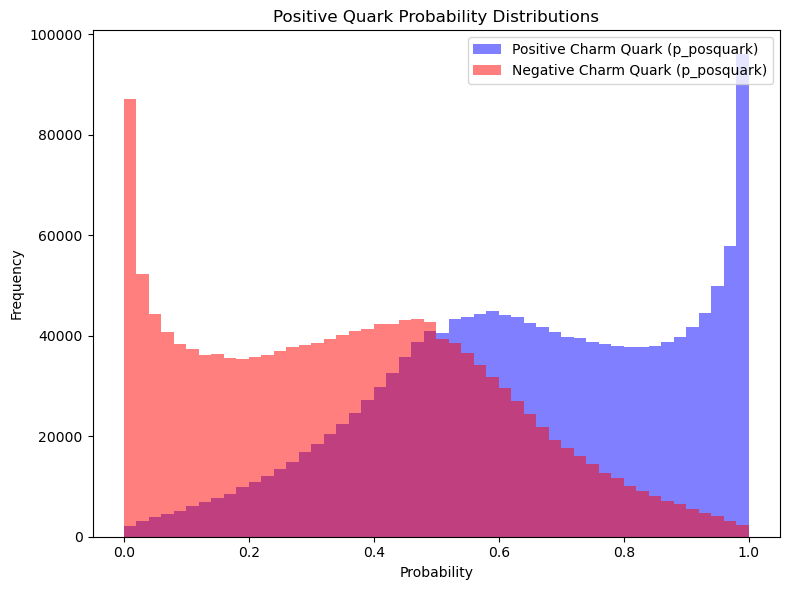

Overall Classification Accuracy for Charm Quarks: 0.7158


In [33]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Load the data
file_path = '/pscratch/sd/n/nishank/shapiro_pi2/salt/logs/4_20240817-T141719/ckpts/epoch=076-val_loss=0.00000__test_pp_output_test_wjets_muc.h5'

with h5py.File(file_path, 'r') as file:
    p_negquark = file["jets"]["p_negquark"][:]
    p_posquark = file["jets"]["p_posquark"][:]
    quark_label = file["jets"]["flavour_label"][:]  # Truth labels for quarks
    quark_charge = file["jets"]["quarkCharge"][:]   # Charge labels for quarks

# Adjusted label values based on the information:
# 0 = bottom quarks, 1 = charm quarks, 2 = light quarks
charm_label_value = 0  # Assuming charm quarks have label 1
positive_charge_value = 1
negative_charge_value = -1 

# Mask for charm quarks (both positive and negative)
mask_charm = (quark_label == charm_label_value)

# Separate masks for positive and negative charm quarks
mask_charm_pos = mask_charm & (quark_charge == positive_charge_value)
mask_charm_neg = mask_charm & (quark_charge == negative_charge_value)

# Plotting the probability distributions for positive and negative charm quarks on the same plot
plt.figure(figsize=(8, 6))

plt.hist(p_posquark[mask_charm_pos], bins=50, alpha=0.5, label='Positive Charm Quark (p_posquark)', color='blue')
plt.hist(p_posquark[mask_charm_neg], bins=50, alpha=0.5, label='Negative Charm Quark (p_posquark)', color='red')

plt.title('Positive Quark Probability Distributions')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Classification rule: if p_posquark > p_negquark, predict positive; otherwise, predict negative
predictions = np.where(p_posquark[mask_charm] > p_negquark[mask_charm], positive_charge_value, negative_charge_value)

# Calculate accuracy by comparing predictions to true charge labels
accuracy = np.mean(predictions == quark_charge[mask_charm])
print(f'Overall Classification Accuracy for Charm Quarks: {accuracy:.4f}')


[-1  1]


/tmp/ipykernel_89521/3151369299.py:32: RuntimeWarning: divide by zero encountered in divide
  plt.plot(tpr_aux, 1 / fpr_aux, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_aux:.2f})')


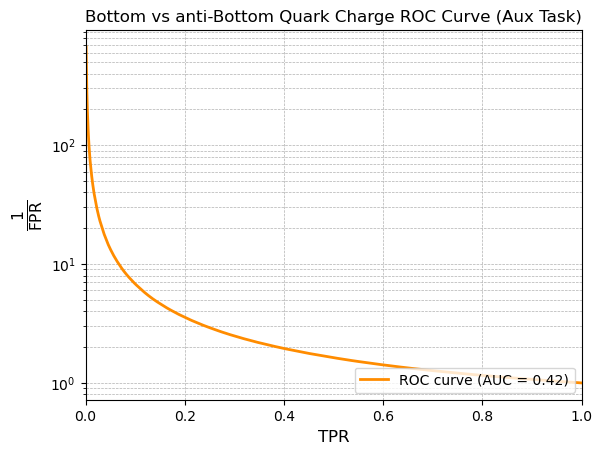

In [23]:
import h5py
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Load the HDF5 file
file_path = '/pscratch/sd/n/nishank/shapiro_pi2/salt/logs/4_20240817-T141719/ckpts/epoch=076-val_loss=0.00000__test_pp_output_test_wjets_mub.h5'
with h5py.File(file_path, 'r') as file:
    # Extract the data
    quark_charge = file['jets']['quarkCharge'][:]  # -1, 0, or +1
    p_negquark = file['jets']['p_negquark'][:]  # Probability of being negative
    p_posquark = file['jets']['p_posquark'][:]  # Probability of being positive

# Filter out occurrences where quarkCharge is 0
valid_indices = quark_charge != 0
quark_charge = quark_charge[valid_indices]
p_negquark = p_negquark[valid_indices]
p_posquark = p_posquark[valid_indices]
print(np.unique(quark_charge))
# Convert quarkCharge from -1 to 0 for the negative class
quark_labels = np.where(quark_charge == -1, 0, 1)

# Use p_posquark as the predicted probabilities for the positive class (label 1)
predicted_probabilities = p_posquark

# Compute ROC curve and AUC score
fpr_aux, tpr_aux, thresholds_aux = roc_curve(quark_labels, predicted_probabilities)
roc_auc_aux = auc(fpr_aux, tpr_aux)

# Plot the ROC curve
plt.figure()
plt.plot(tpr_aux, 1 / fpr_aux, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_aux:.2f})')
plt.xlim([0.0, 1.0])
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.yscale('log')
plt.xlabel(r'$\text{TPR}$', fontsize=12)
plt.ylabel(r'$\frac{1}{\text{FPR}}$', fontsize=16)
plt.title('Bottom vs anti-Bottom Quark Charge ROC Curve (Aux Task)')
plt.legend(loc="lower right")
plt.show()


[0]
[-1  0  1]


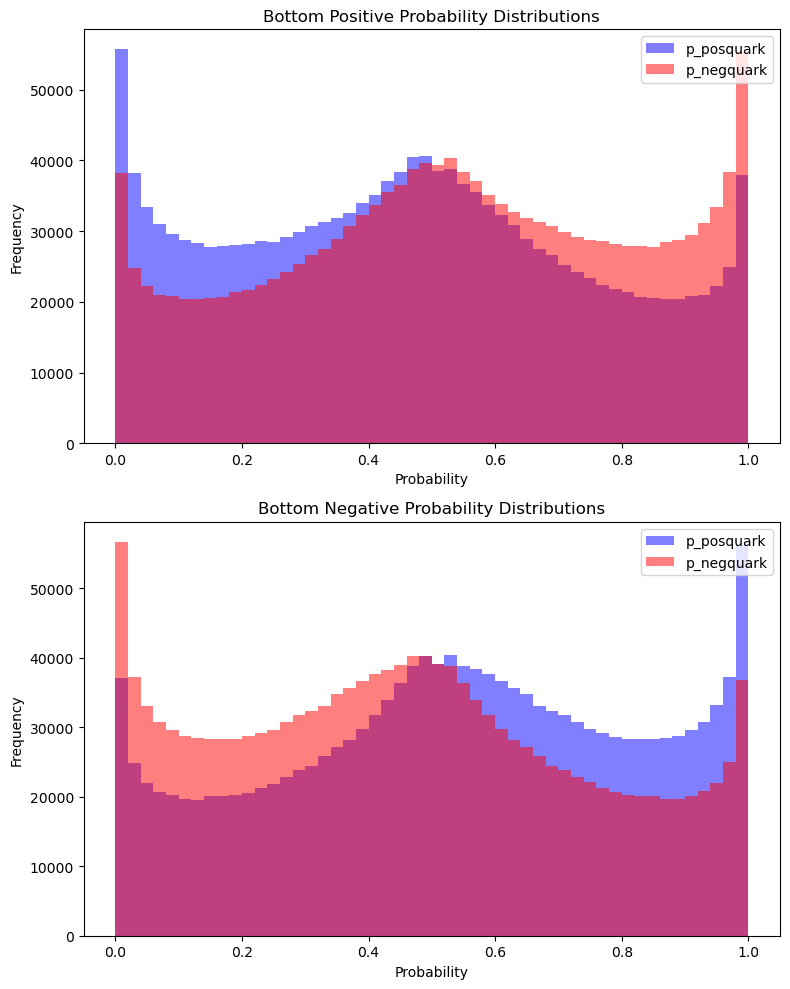

In [15]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Load the data
file_path = '/pscratch/sd/n/nishank/shapiro_pi2/salt/logs/4_20240817-T141719/ckpts/epoch=076-val_loss=0.00000__test_pp_output_test_wjets_mub.h5'

with h5py.File(file_path, 'r') as file:
    p_negquark = file["jets"]["p_negquark"][:]
    # print('bot', file["jets"]["GN2_charge_reco_pb"][100000:100100])
    # print('charm', file["jets"]["GN2_charge_reco_pc"][100000:100100])
    # print('light', file["jets"]["GN2_charge_reco_pu"][100000:100100])
    #print(file["jets"]["flavour_label"][200000:200100])
    #print('lights', file["jets"]["p_lightquark"][100000:101000])
    #print('p_negquark', file["jets"]["p_negquark"][200000:201000])
    p_posquark = file["jets"]["p_posquark"][:]
    #print('p_posquark',file["jets"]["p_posquark"][200000:201000])
    quark_label = file["jets"]["flavour_label"][:]  # Truth labels for quarks
    print(np.unique(quark_label))
    quark_charge = file["jets"]["quarkCharge"][:]
    print(np.unique(quark_charge))
    #print('quarkCharge label', file["jets"]["quarkCharge"][200000:201000])# Charge labels for quarks

# Adjusted label values based on the information:
# 0 = bottom quarks, 1 = charm quarks, 2 = light quarks
charm_label_value = 0
other_label_value = 1
light_label_value = 2
positive_charge_value = 1
negative_charge_value = -1 

mask_bottom_pos = (quark_label == bottom_label_value) & (quark_charge == positive_charge_value)
mask_bottom_neg = (quark_label == bottom_label_value) & (quark_charge == negative_charge_value)
mask_charm_pos = (quark_label == charm_label_value) & (quark_charge == positive_charge_value)
mask_charm_neg = (quark_label == charm_label_value) & (quark_charge == negative_charge_value)
mask_light = (quark_label == light_label_value)

fig, axs = plt.subplots(2, 1, figsize=(8, 10))
categories = [
    ('Bottom Positive', mask_bottom_pos),
    ('Bottom Negative', mask_bottom_neg)
    # ('Charm Positive', mask_charm_pos),
    # ('Charm Negative', mask_charm_neg),
    # ('Light', mask_light)
]

for i, (label, mask) in enumerate(categories):
    axs[i].hist(p_posquark[mask], bins=50, alpha=0.5, label='p_posquark', color='blue')
    axs[i].hist(p_negquark[mask], bins=50, alpha=0.5, label='p_negquark', color='red')
    #axs[i].hist(p_lightquark[mask], bins=50, alpha=0.5, label='p_lightquark', color='green')
    
    axs[i].set_title(f'{label} Probability Distributions')
    axs[i].set_xlabel('Probability')
    axs[i].set_ylabel('Frequency')
    axs[i].legend(loc='upper right')

plt.tight_layout()
plt.show()


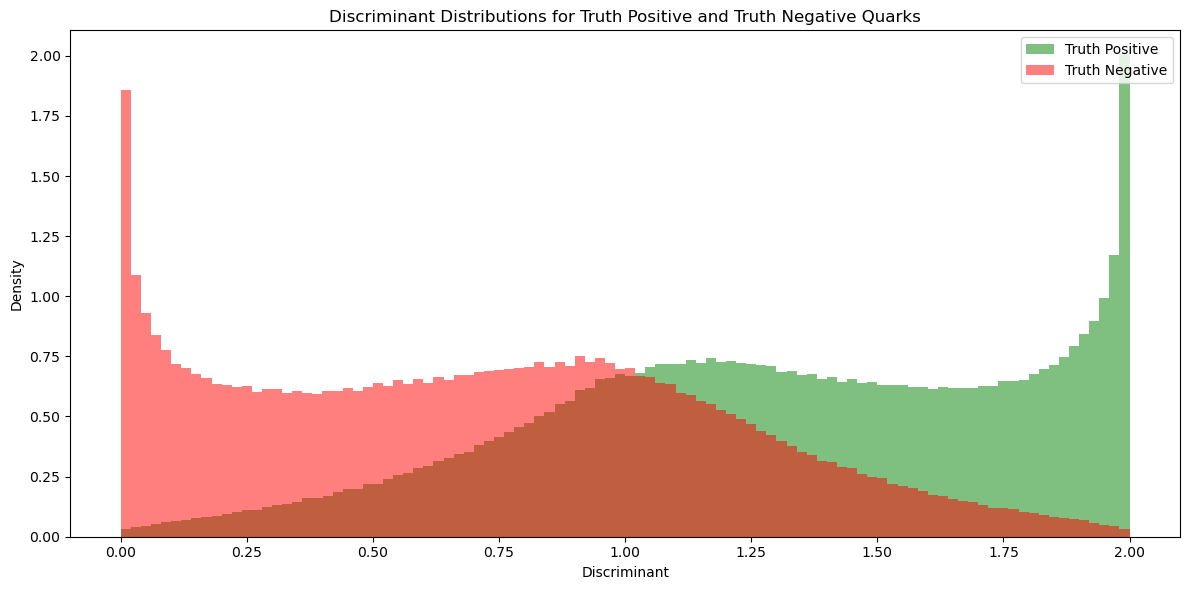

In [21]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Load the data
file_path = '/pscratch/sd/n/nishank/shapiro_pi2/salt/logs/4_20240817-T141719/ckpts/epoch=076-val_loss=0.00000__test_pp_output_test_wjets_muc.h5'
with h5py.File(file_path, 'r') as file:
    p_negquark = file["jets"]["p_negquark"][:]
    p_posquark = file["jets"]["p_posquark"][:]
    quark_label = file["jets"]["flavour_label"][:]
    quark_charge = file["jets"]["quarkCharge"][:]

# Define discriminant function
def discriminant(p_pos, p_neg):
    return p_pos / (0.5 * p_neg + 0.5 * p_pos)

# Calculate discriminant for all quarks
disc = discriminant(p_posquark, p_negquark)

# Create masks for truth positive and truth negative quarks
mask_truth_positive = quark_charge > 0
mask_truth_negative = quark_charge < 0

# Create the plot
plt.figure(figsize=(12, 6))

# Plot discriminant distributions
plt.hist(disc[mask_truth_positive], bins=100, alpha=0.5, label='Truth Positive', color='green', density=True)
plt.hist(disc[mask_truth_negative], bins=100, alpha=0.5, label='Truth Negative', color='red', density=True)

plt.title('Discriminant Distributions for Truth Positive and Truth Negative Quarks')
plt.xlabel('Discriminant')
plt.ylabel('Density')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

Classification Accuracy: 65.62%


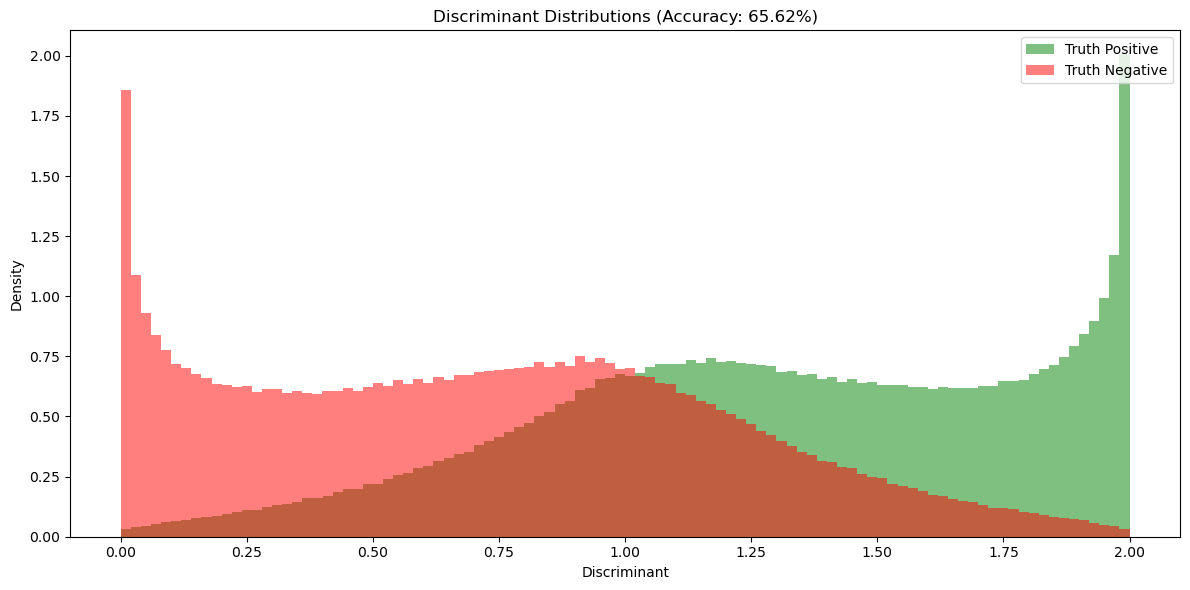

In [24]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Load the data
file_path = '/pscratch/sd/n/nishank/shapiro_pi2/salt/logs/4_20240817-T141719/ckpts/epoch=076-val_loss=0.00000__test_pp_output_test_wjets_muc.h5'
with h5py.File(file_path, 'r') as file:
    p_negquark = file["jets"]["p_negquark"][:]
    p_posquark = file["jets"]["p_posquark"][:]
    quark_label = file["jets"]["flavour_label"][:]
    quark_charge = file["jets"]["quarkCharge"][:]

# Define discriminant function
def discriminant(p_pos, p_neg):
    return p_pos / (0.5 * p_neg + 0.5 * p_pos)

# Calculate discriminant for all quarks
disc = discriminant(p_posquark, p_negquark)

# Create masks for truth positive and truth negative quarks
mask_truth_positive = quark_charge > 0
mask_truth_negative = quark_charge < 0

# Calculate classification accuracy
def calculate_accuracy(discriminant, true_labels, threshold=0.5):
    predicted_labels = discriminant > threshold
    correct_classifications = np.sum(predicted_labels == true_labels)
    total_samples = len(true_labels)
    accuracy = correct_classifications / total_samples
    return accuracy * 100  # Convert to percentage

# Convert quark charges to binary labels (1 for positive, 0 for negative)
true_labels = quark_charge > 0

# Calculate and print accuracy
accuracy = calculate_accuracy(disc, true_labels)
print(f"Classification Accuracy: {accuracy:.2f}%")

# Create the plot
plt.figure(figsize=(12, 6))

# Plot discriminant distributions
plt.hist(disc[mask_truth_positive], bins=100, alpha=0.5, label='Truth Positive', color='green', density=True)
plt.hist(disc[mask_truth_negative], bins=100, alpha=0.5, label='Truth Negative', color='red', density=True)

plt.title(f'Discriminant Distributions (Accuracy: {accuracy:.2f}%)')
plt.xlabel('Discriminant')
plt.ylabel('Density')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

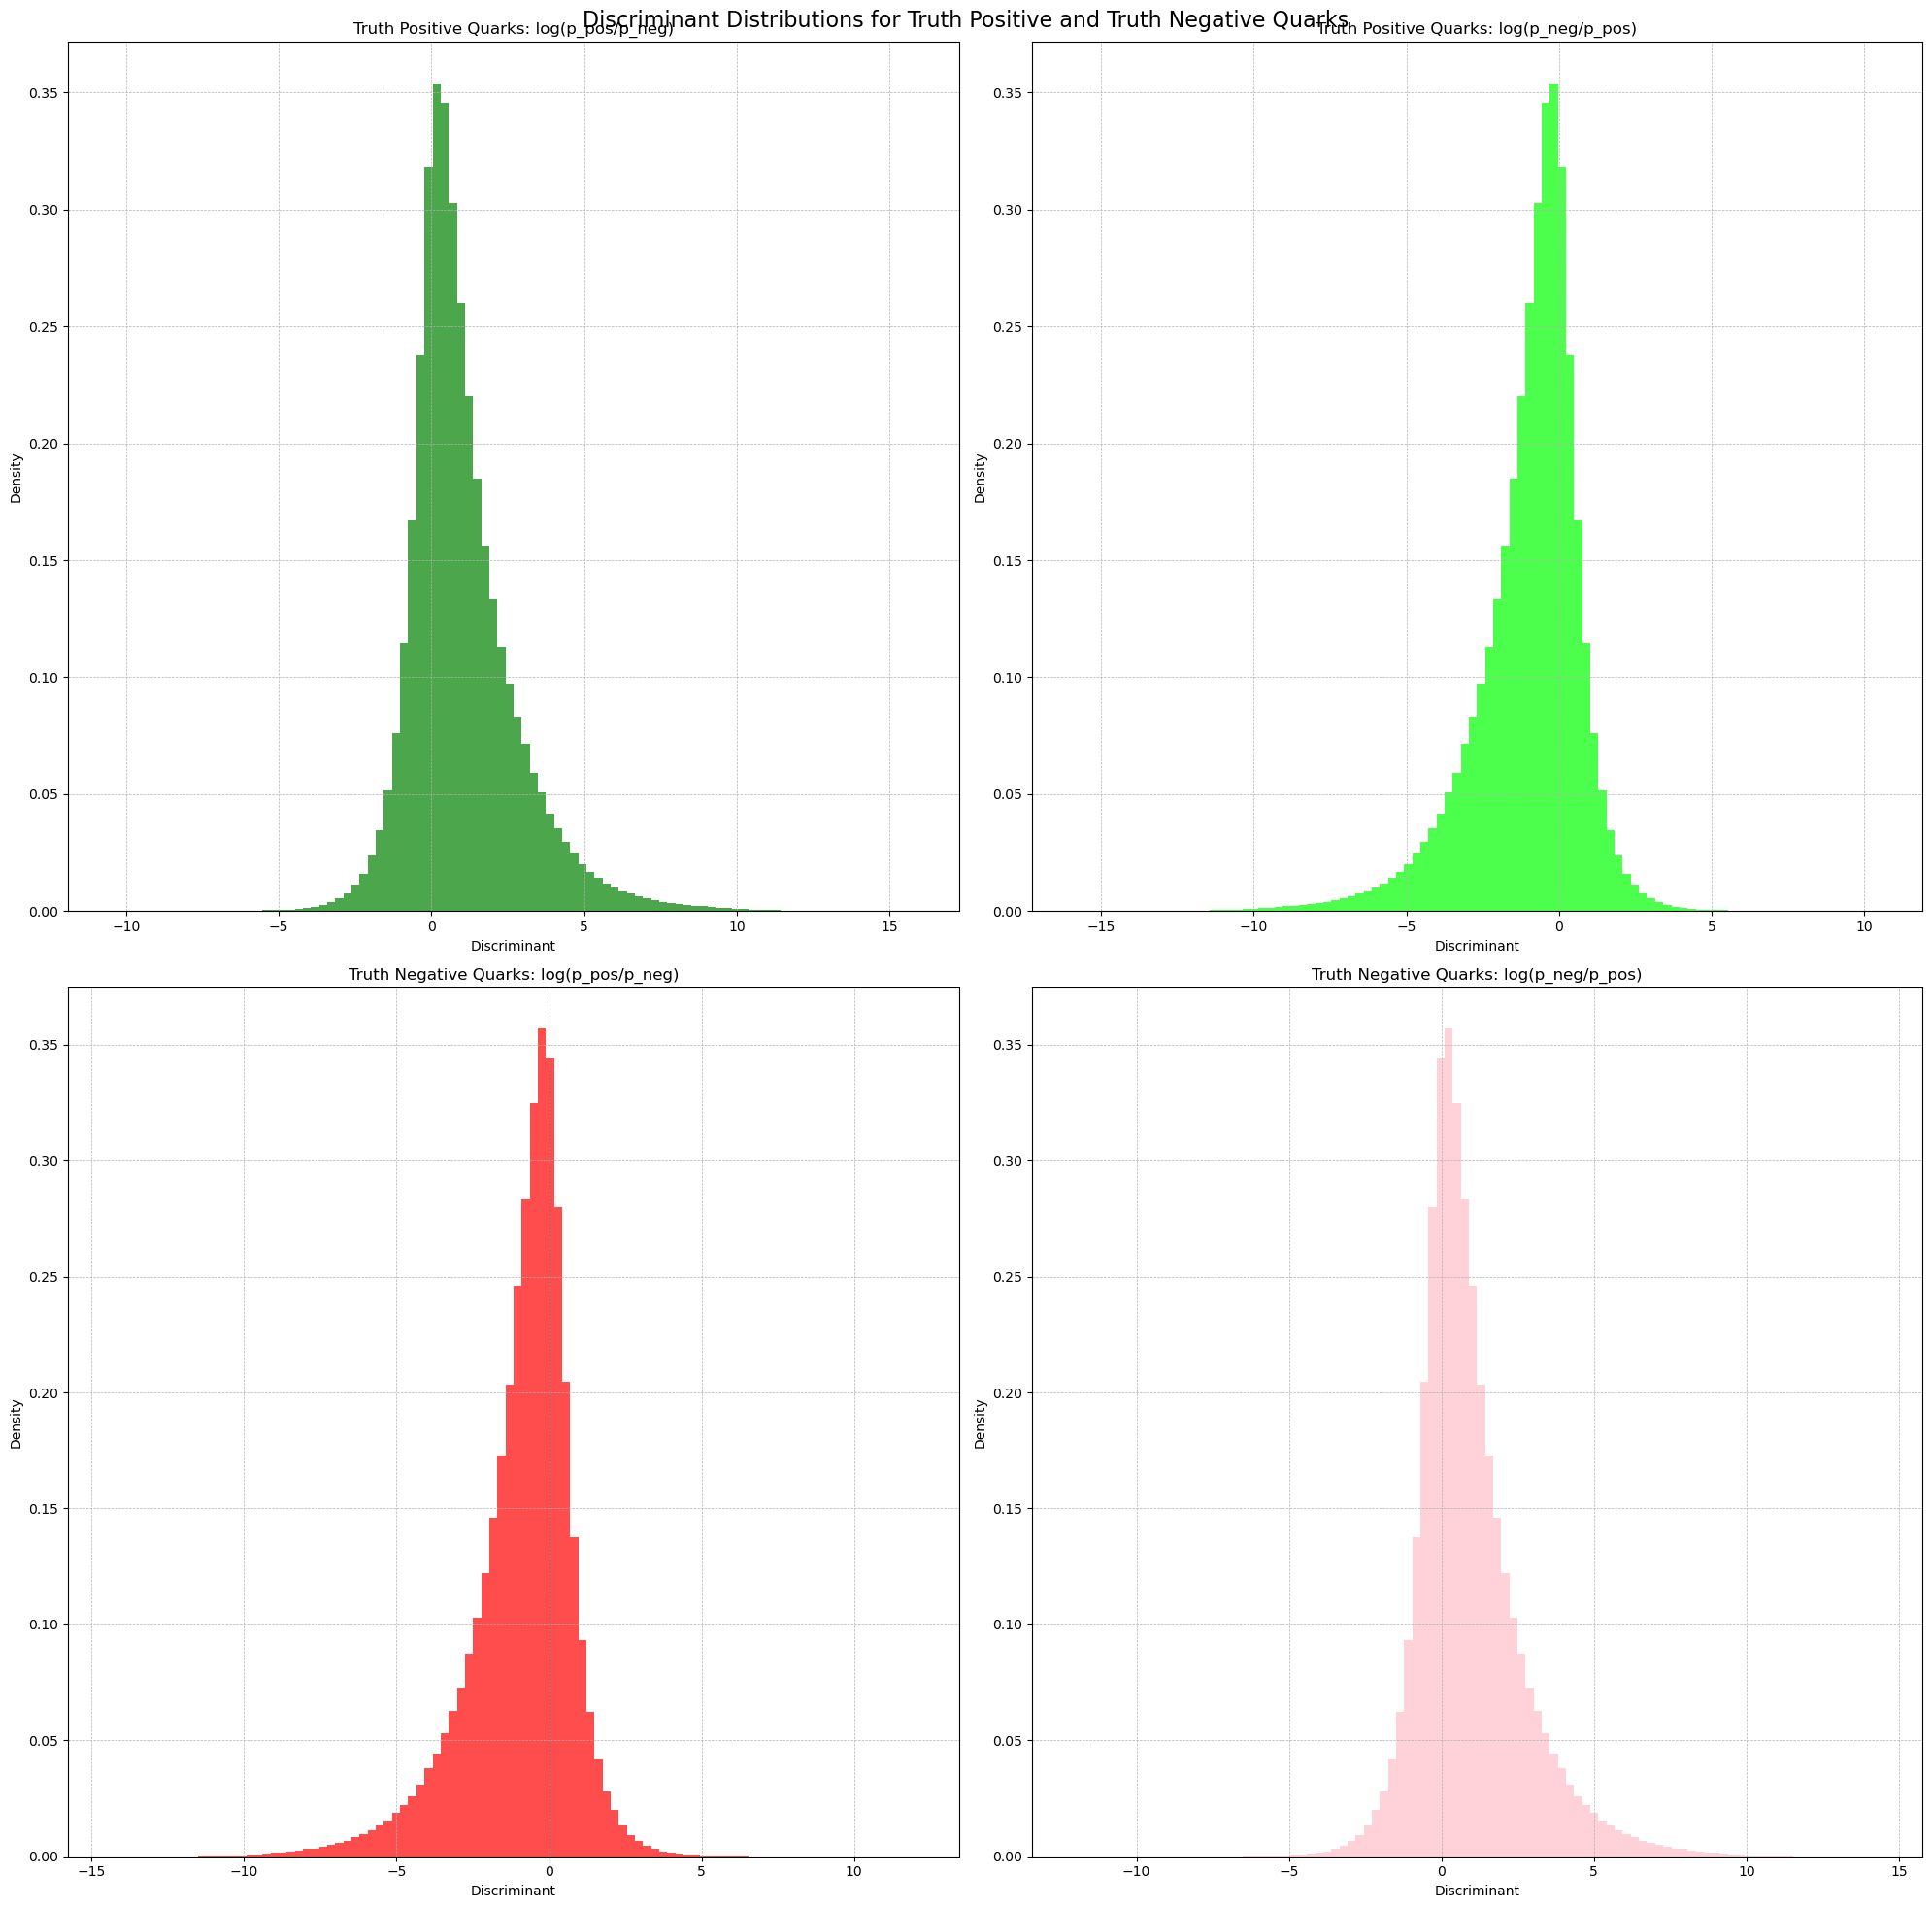

In [23]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Load the data
file_path = '/pscratch/sd/n/nishank/shapiro_pi2/salt/logs/4_20240817-T141719/ckpts/epoch=076-val_loss=0.00000__test_pp_output_test_wjets_muc.h5'
with h5py.File(file_path, 'r') as file:
    p_negquark = file["jets"]["p_negquark"][:]
    p_posquark = file["jets"]["p_posquark"][:]
    quark_label = file["jets"]["flavour_label"][:]
    quark_charge = file["jets"]["quarkCharge"][:]

# Define discriminant functions
def discriminant_positive(p_pos, p_neg):
    return np.log(p_pos / p_neg)

def discriminant_negative(p_pos, p_neg):
    return np.log(p_neg / p_pos)

# Calculate discriminants
disc_positive = discriminant_positive(p_posquark, p_negquark)
disc_negative = discriminant_negative(p_posquark, p_negquark)

# Create masks for truth positive and truth negative quarks
mask_truth_positive = quark_charge > 0
mask_truth_negative = quark_charge < 0

# Create the plots
fig, axs = plt.subplots(2, 2, figsize=(20, 20))
fig.suptitle('Discriminant Distributions for Truth Positive and Truth Negative Quarks', fontsize=16)

# Plot 1: Truth Positive Quarks, log(p_pos/p_neg)
axs[0, 0].hist(disc_positive[mask_truth_positive], bins=100, alpha=0.7, color='green', density=True)
axs[0, 0].set_title('Truth Positive Quarks: log(p_pos/p_neg)')
axs[0, 0].set_xlabel('Discriminant')
axs[0, 0].set_ylabel('Density')
axs[0, 0].grid(True, which='both', linestyle='--', linewidth=0.5)

# Plot 2: Truth Positive Quarks, log(p_neg/p_pos)
axs[0, 1].hist(disc_negative[mask_truth_positive], bins=100, alpha=0.7, color='lime', density=True)
axs[0, 1].set_title('Truth Positive Quarks: log(p_neg/p_pos)')
axs[0, 1].set_xlabel('Discriminant')
axs[0, 1].set_ylabel('Density')
axs[0, 1].grid(True, which='both', linestyle='--', linewidth=0.5)

# Plot 3: Truth Negative Quarks, log(p_pos/p_neg)
axs[1, 0].hist(disc_positive[mask_truth_negative], bins=100, alpha=0.7, color='red', density=True)
axs[1, 0].set_title('Truth Negative Quarks: log(p_pos/p_neg)')
axs[1, 0].set_xlabel('Discriminant')
axs[1, 0].set_ylabel('Density')
axs[1, 0].grid(True, which='both', linestyle='--', linewidth=0.5)

# Plot 4: Truth Negative Quarks, log(p_neg/p_pos)
axs[1, 1].hist(disc_negative[mask_truth_negative], bins=100, alpha=0.7, color='pink', density=True)
axs[1, 1].set_title('Truth Negative Quarks: log(p_neg/p_pos)')
axs[1, 1].set_xlabel('Discriminant')
axs[1, 1].set_ylabel('Density')
axs[1, 1].grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

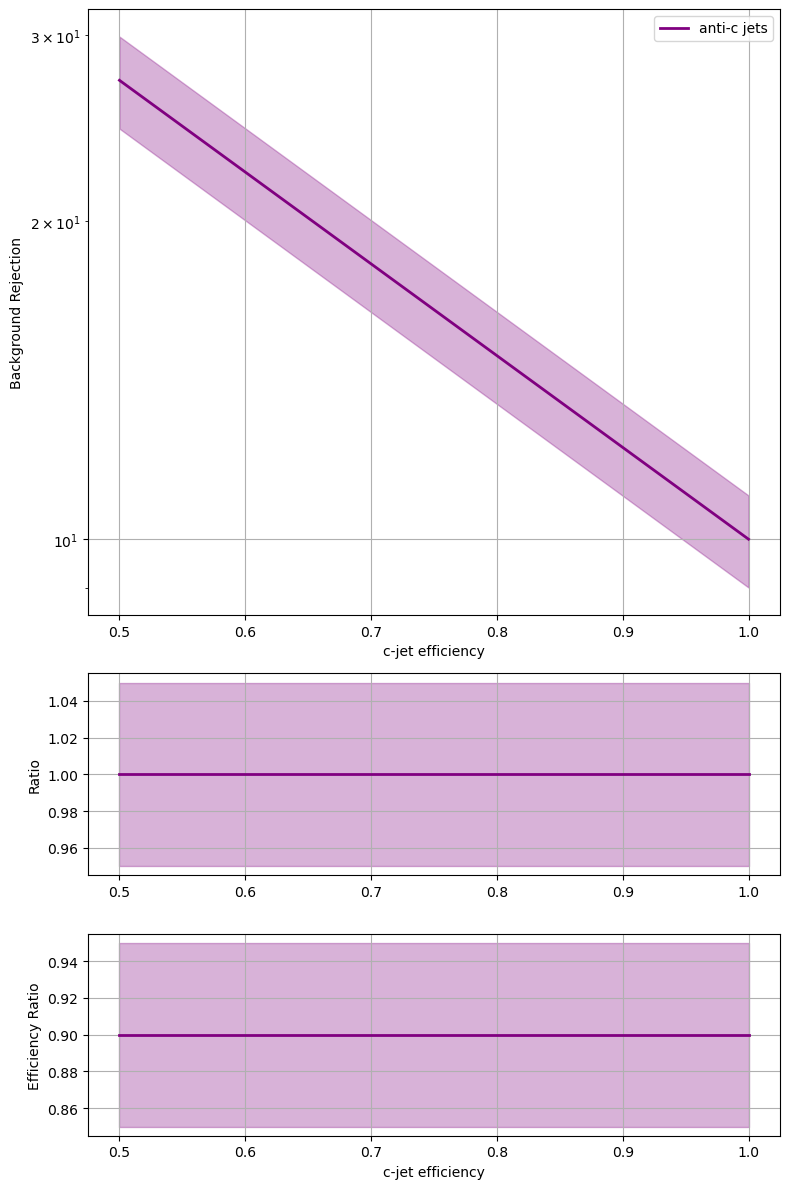

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Dummy data for illustration purposes
c_jet_efficiency = np.linspace(0.5, 1.0, 100)  # Simulated c-jet efficiency
background_rejection_antic = np.exp(-2 * (c_jet_efficiency - 1)) * 10  # Example rejection rate for anti-c jets

# Simulated error bands (these can be replaced with real data uncertainties)
error_antic = 0.1 * background_rejection_antic

# Creating the plot
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 12), gridspec_kw={'height_ratios': [3, 1, 1]})

# Top panel: Background rejection vs. c-jet efficiency
ax1.plot(c_jet_efficiency, background_rejection_antic, label='anti-c jets', color='purple', lw=2)

# Shaded uncertainty bands
ax1.fill_between(c_jet_efficiency, background_rejection_antic - error_antic, background_rejection_antic + error_antic, color='purple', alpha=0.3)

# Set y-axis to match the scale from the reference plot
ax1.set_yscale('log')
#ax1.set_ylim(10, 1e3)  # Adjusting the y-axis limits to match the reference plot
ax1.set_ylabel('Background Rejection')
ax1.set_xlabel('c-jet efficiency')
ax1.legend(loc='upper right')
ax1.grid(True)

# Middle panel: Ratio of current model to a baseline model (for example)
ratio_antic = np.ones_like(c_jet_efficiency)  # Example ratio, can be calculated from real data

ax2.plot(c_jet_efficiency, ratio_antic, label='anti-c jets', color='purple', lw=2)

# Shaded uncertainty bands for ratio
ax2.fill_between(c_jet_efficiency, ratio_antic - 0.05, ratio_antic + 0.05, color='purple', alpha=0.3)

ax2.set_ylabel('Ratio')
ax2.grid(True)

# Bottom panel: Another metric (e.g., efficiency or other performance ratio)
ax3.plot(c_jet_efficiency, ratio_antic * 0.9, label='anti-c jets', color='purple', lw=2)

# Shaded uncertainty bands
ax3.fill_between(c_jet_efficiency, ratio_antic * 0.9 - 0.05, ratio_antic * 0.9 + 0.05, color='purple', alpha=0.3)

ax3.set_ylabel('Efficiency Ratio')
ax3.set_xlabel('c-jet efficiency')
ax3.grid(True)

# Adjust layout to match the style of the provided plot
plt.tight_layout()
plt.show()


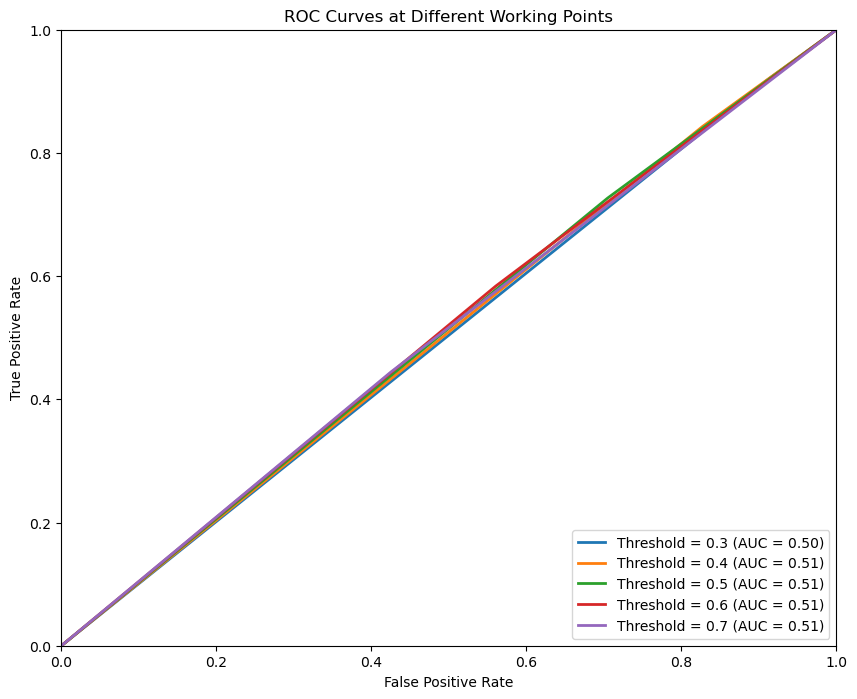

In [10]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Load the data
file_path = '/pscratch/sd/n/nishank/shapiro_pi2/salt/logs/4_20240817-T141719/ckpts/epoch=076-val_loss=0.00000__test_pp_output_test_wjets_muc.h5'

with h5py.File(file_path, 'r') as file:
    p_negquark = file["jets"]["p_negquark"][:]
    p_posquark = file["jets"]["p_posquark"][:]
    quark_label = file["jets"]["flavour_label"][:]  # Truth labels for quarks
    quark_charge = file["jets"]["quarkCharge"][:]  # Charge labels for quarks

# Define the label values for quarks and charges
charm_label_value = 0
positive_charge_value = 1
negative_charge_value = -1

# Create masks for different categories
mask_charm_pos = (quark_label == charm_label_value) & (quark_charge == positive_charge_value)
mask_charm_neg = (quark_label == charm_label_value) & (quark_charge == negative_charge_value)

# Combine positive and negative quark probabilities for charm quarks
charm_probs_pos = p_posquark[mask_charm_pos]
charm_probs_neg = p_negquark[mask_charm_neg]

# Combine probabilities and create labels
charm_probs = np.concatenate([charm_probs_pos, charm_probs_neg])
charm_labels = np.concatenate([np.ones(len(charm_probs_pos)), np.zeros(len(charm_probs_neg))])  # 1 for positive, 0 for negative

# Define working points (thresholds) from 30% to 70% in increments of 10%
working_points = np.arange(0.3, 0.8, 0.1)

plt.figure(figsize=(10, 8))

for threshold in working_points:
    # Classify as negative if p_negquark >= threshold, else classify as positive
    predicted_labels = (charm_probs >= threshold).astype(int)
    
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(charm_labels, predicted_labels)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve for this threshold
    plt.plot(fpr, tpr, lw=2, label=f'Threshold = {threshold:.1f} (AUC = {roc_auc:.2f})')

# Plot the random guessing line

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves at Different Working Points')
plt.legend(loc="lower right")
plt.show()


In [3]:
file_path = '/pscratch/sd/n/nishank/shapiro_pi2/salt/logs/GN2_antic_20240816-T172503/ckpts/epoch=003-val_loss=0.00000__test_pp_output_test_wjets_muc.h5'
with h5py.File(file_path, 'r') as file:
    print(file["jets"].dtype)

[('SV1_correctSignificance3d', '<f4'), ('softMuon_pt', '<f4'), ('softMuon_dR', '<f4'), ('softMuon_eta', '<f4'), ('softMuon_phi', '<f4'), ('softMuon_qOverPratio', '<f4'), ('softMuon_momentumBalanceSignificance', '<f4'), ('softMuon_scatteringNeighbourSignificance', '<f4'), ('softMuon_pTrel', '<f4'), ('softMuon_ip3dD0', '<f4'), ('softMuon_ip3dZ0', '<f4'), ('softMuon_ip3dD0Significance', '<f4'), ('softMuon_ip3dZ0Significance', '<f4'), ('softMuon_ip3dD0Uncertainty', '<f4'), ('softMuon_ip3dZ0Uncertainty', '<f4'), ('JetFitterFlip_energyFraction', '<f4'), ('JetFitterFlip_mass', '<f4'), ('JetFitterFlip_significance3d', '<f4'), ('JetFitterFlip_deltaphi', '<f4'), ('JetFitterFlip_deltaeta', '<f4'), ('JetFitterFlip_massUncorr', '<f4'), ('JetFitterFlip_dRFlightDir', '<f4'), ('pt_btagJes', '<f4'), ('eta_btagJes', '<f4'), ('absEta_btagJes', '<f4'), ('scalarSumTrackPt', '<f4'), ('JetFitter_energyFraction', '<f4'), ('JetFitter_mass', '<f4'), ('JetFitter_significance3d', '<f4'), ('JetFitter_deltaphi', '<

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
p_negquark [5.61523438e-01 6.78222656e-01 6.08398438e-01 2.51708984e-01
 5.07324219e-01 9.44213867e-02 6.69921875e-01 1.01379395e-01
 3.83300781e-01 2.87597656e-01 1.33789062e-01 2.67822266e-01
 7.97851562e-01 4.80224609e-01 1.38427734e-01 6.08520508e-02
 9.91699219e-01 9.58496094e-01 1.86920166e-02 5.48828125e-01
 2.62451172e-01 7.63671875e-01 4.87548828e-01 8.07128906e-01
 5.50292969e-01 9.49096680e-02 8.81835938e-01 7.49511719e-01
 1.62353516e-01 4.68994141e-01 5.72753906e-01 5.29785156e-01
 2.69531250e-01 4.98046875e-01 5.50781250e-01 3.93066406e-01
 3.54980469e-01 8.90625000e-01 4.28222656e-01 6.36718750e-01
 9.98535156e-01 4.06494141e-01 5.22460938e-01 1.77001953e-02
 7.48535156e-01 7.43652344e-01 1.87988281e-01 3.83300781e-01
 1.47949219e-01 5.95703125e-01 3.68896484e-01 1.04751

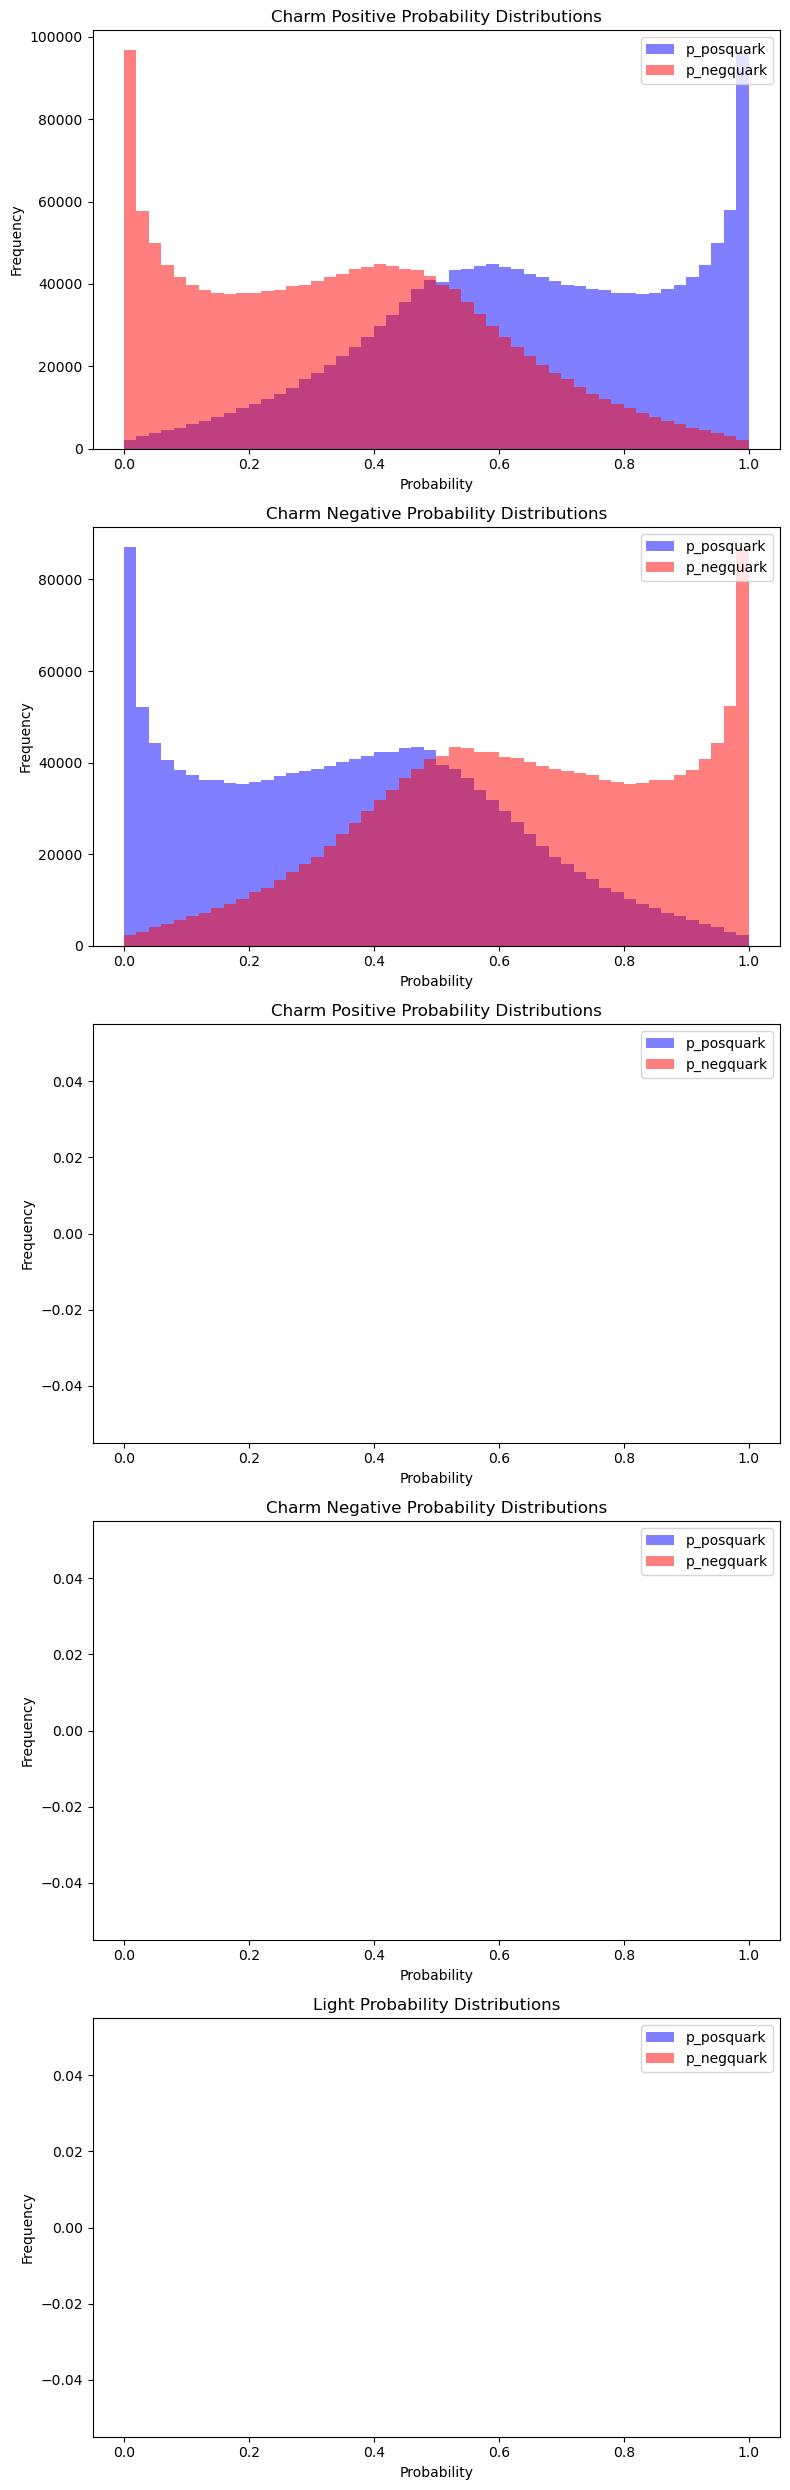

In [5]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Load the data
file_path = '/pscratch/sd/n/nishank/shapiro_pi2/salt/logs/4_20240817-T141719/ckpts/epoch=076-val_loss=0.00000__test_pp_output_test_wjets_muc.h5'

with h5py.File(file_path, 'r') as file:
    p_negquark = file["jets"]["p_negquark"][:]
    # print('bot', file["jets"]["GN2_charge_reco_pb"][100000:100100])
    # print('charm', file["jets"]["GN2_charge_reco_pc"][100000:100100])
    # print('light', file["jets"]["GN2_charge_reco_pu"][100000:100100])
    print(file["jets"]["flavour_label"][200000:200100])
    #print('lights', file["jets"]["p_lightquark"][100000:101000])
    print('p_negquark', file["jets"]["p_negquark"][200000:201000])
    p_posquark = file["jets"]["p_posquark"][:]
    print('p_posquark',file["jets"]["p_posquark"][200000:201000])
    quark_label = file["jets"]["flavour_label"][:]  # Truth labels for quarks
    quark_charge = file["jets"]["quarkCharge"][:]
    print('quarkCharge label', file["jets"]["quarkCharge"][200000:201000])# Charge labels for quarks

# Adjusted label values based on the information:
# 0 = bottom quarks, 1 = charm quarks, 2 = light quarks
bottom_label_value = 0
charm_label_value = 1
light_label_value = 2
positive_charge_value = 1
negative_charge_value = -1 

mask_bottom_pos = (quark_label == bottom_label_value) & (quark_charge == positive_charge_value)
mask_bottom_neg = (quark_label == bottom_label_value) & (quark_charge == negative_charge_value)
mask_charm_pos = (quark_label == charm_label_value) & (quark_charge == positive_charge_value)
mask_charm_neg = (quark_label == charm_label_value) & (quark_charge == negative_charge_value)
mask_light = (quark_label == light_label_value)

fig, axs = plt.subplots(5, 1, figsize=(8, 25))
categories = [
    ('Charm Positive', mask_bottom_pos),
    ('Charm Negative', mask_bottom_neg),
    ('Charm Positive', mask_charm_pos),
    ('Charm Negative', mask_charm_neg),
    ('Light', mask_light)
]

for i, (label, mask) in enumerate(categories):
    axs[i].hist(p_posquark[mask], bins=50, alpha=0.5, label='p_posquark', color='blue')
    axs[i].hist(p_negquark[mask], bins=50, alpha=0.5, label='p_negquark', color='red')
    #axs[i].hist(p_lightquark[mask], bins=50, alpha=0.5, label='p_lightquark', color='green')
    
    axs[i].set_title(f'{label} Probability Distributions')
    axs[i].set_xlabel('Probability')
    axs[i].set_ylabel('Frequency')
    axs[i].legend(loc='upper right')

plt.tight_layout()
plt.show()


In [21]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load the data
file_path = '/pscratch/sd/n/nishank/shapiro_pi2/salt/logs/4_20240814-T051705/ckpts/epoch=034-val_loss=0.60973__test_test.h5'
with h5py.File(file_path, 'r') as file:
    p_negquark = file["jets"]["p_negquark"][:]
    p_lightquark = file["jets"]["p_lightquark"][:]
    p_posquark = file["jets"]["p_posquark"][:]
    quark_label = file["jets"]["flavour_label"][:]  # Truth labels for quarks
    quark_charge = file["jets"]["quarkCharge"][:]   # Charge labels for quarks

# Adjusted label values based on the information:
# 0 = bottom quarks, 1 = charm quarks, 2 = light quarks
bottom_label_value = 0
charm_label_value = 1
light_label_value = 2
positive_charge_value = 1  # Positive charge
negative_charge_value = -1  # Negative charge

# Create masks for different quark types based on truth labels
mask_bottom_pos = (quark_label == bottom_label_value) & (quark_charge == positive_charge_value)
mask_bottom_neg = (quark_label == bottom_label_value) & (quark_charge == negative_charge_value)
mask_charm_pos = (quark_label == charm_label_value) & (quark_charge == positive_charge_value)
mask_charm_neg = (quark_label == charm_label_value) & (quark_charge == negative_charge_value)
mask_light = (quark_label == light_label_value)

# Assign true labels for the confusion matrix
true_labels = np.zeros_like(quark_label)
true_labels[mask_bottom_pos] = 0  # Bottom Positive
true_labels[mask_bottom_neg] = 1  # Bottom Negative
true_labels[mask_charm_pos] = 2  # Charm Positive
true_labels[mask_charm_neg] = 3  # Charm Negative
true_labels[mask_light] = 4  # Light

# Predicted labels based on maximum probability
predictions = np.argmax(np.vstack([p_posquark, p_negquark, p_lightquark]), axis=0)

# Map predicted labels to the same categories as true labels
predicted_labels = np.zeros_like(predictions)
predicted_labels[predictions == 0] = 0  # Predict Bottom Positive if p_posquark is highest
predicted_labels[predictions == 1] = 1  # Predict Bottom Negative if p_negquark is highest
predicted_labels[predictions == 2] = 4  # Predict Light if p_lightquark is highest

# Now, also map Charm Positive/Negative based on some conditions
# If a quark is predicted as positive or negative, we check if it's a charm
predicted_labels[(predictions == 0) & (quark_label == charm_label_value)] = 2  # Charm Positive
predicted_labels[(predictions == 1) & (quark_label == charm_label_value)] = 3  # Charm Negative

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels, normalize='true')

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=['Bottom Pos', 'Bottom Neg', 'Charm Pos', 'Charm Neg', 'Light'],
            yticklabels=['Bottom Pos', 'Bottom Neg', 'Charm Pos', 'Charm Neg', 'Light'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/your/local/path/to/epoch=034-val_loss=0.60973__test_90M_final_testing.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

<Figure size 640x480 with 0 Axes>

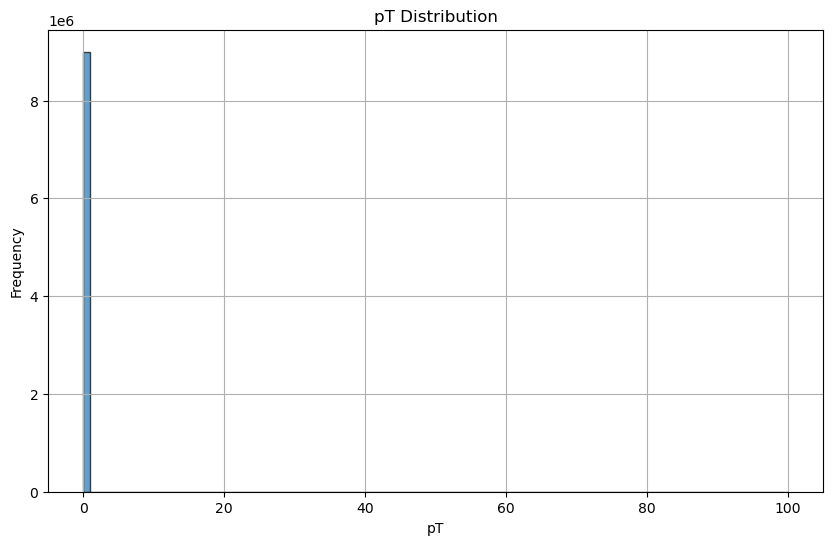

In [19]:
import h5py
import matplotlib.pyplot as plt

# Path to the .h5 file
#file_path = '/pscratch/sd/n/nishank/shapiro_pi2/salt/logs/GN2_20240701-T041601/ckpts/epoch=037-val_loss=0.60887__test_correct.h5'
#file_path = '/pscratch/sd/n/nishank/shapiro_pi2/GN2_fold0_20240226-T063759/ckpts/epoch=034-val_loss=0.57278__test_large.h5'
#file_path = '/global/cfs/cdirs/atlas/jmw464/nishank_pi2/upp_samples/large_mu_sample/output/pp_output_test_wjets_mul.h5'
#file_path = '/pscratch/sd/n/nishank/shapiro_pi2/bvsc_data/pp_output_test_correct.h5'
file_path = '/pscratch/sd/n/nishank/shapiro_pi2/bvsc_data/pp_output_test_large.h5'
# Open the .h5 file
with h5py.File(file_path, 'r') as file:
    # Access the pt data
    raw_pt_data = file["jets"]["pt"][:]
# Plot the pt distribution
plt.clf()
plt.figure(figsize=(10, 6))
plt.hist(raw_pt_data, range=(0,100), bins=100, edgecolor='k', alpha=0.7)
plt.xlabel('pT')
plt.ylabel('Frequency')
plt.title('pT Distribution')
plt.grid(True)  # Save the plot as a .png file
plt.show()

<Figure size 640x480 with 0 Axes>

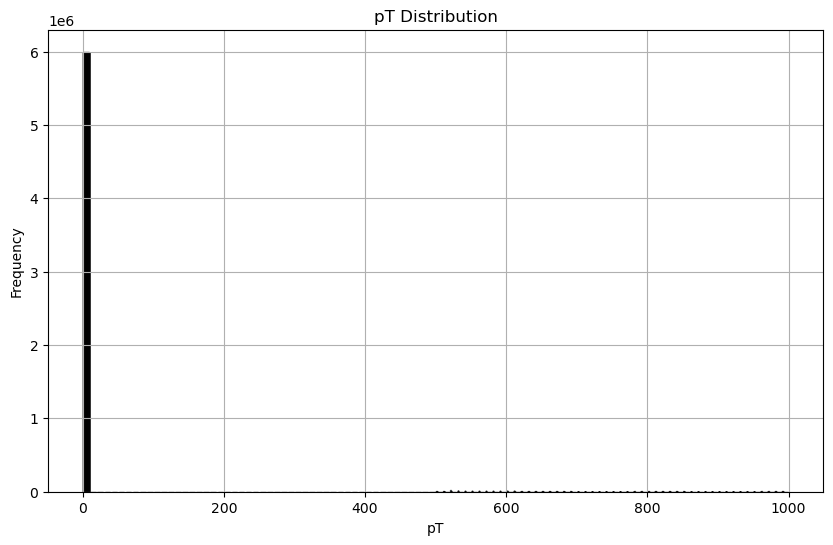

In [12]:
plt.clf()
plt.figure(figsize=(10, 6))
plt.hist(raw_pt_data, range=(0,1000), bins=100, edgecolor='k', alpha=0.7)
plt.xlabel('pT')
plt.ylabel('Frequency')
plt.title('pT Distribution')
plt.grid(True)  # Save the plot as a .png file
plt.show()

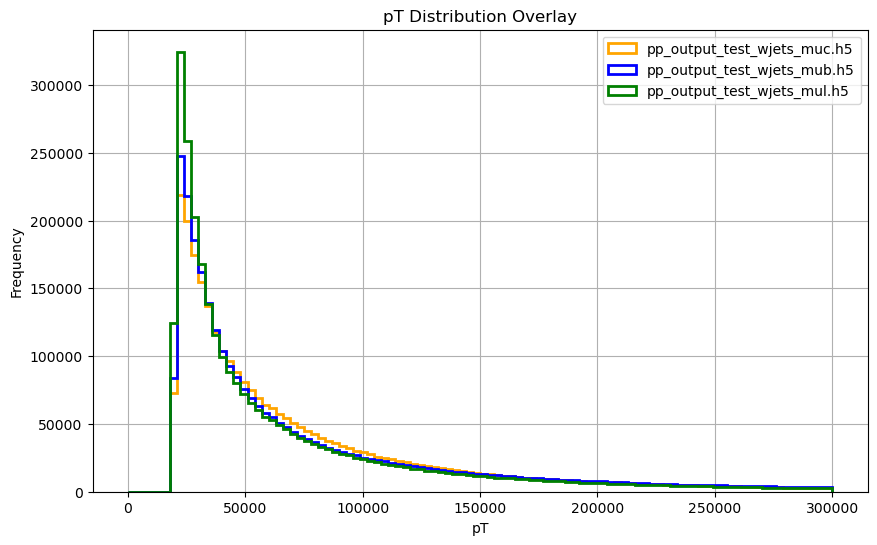

In [1]:
import h5py
import matplotlib.pyplot as plt

# Paths to the .h5 files
file_paths = [
    '/global/cfs/cdirs/atlas/jmw464/nishank_pi2/upp_samples/90M_wjets/output/pp_output_test_wjets_muc.h5',
    '/global/cfs/cdirs/atlas/jmw464/nishank_pi2/upp_samples/90M_wjets/output/pp_output_test_wjets_mub.h5',
    '/global/cfs/cdirs/atlas/jmw464/nishank_pi2/upp_samples/90M_wjets/output/pp_output_test_wjets_mul.h5'
]

# Dictionary to store pt data
pt_data_dict = {}

# Read the pt data from each file
for file_path in file_paths:
    with h5py.File(file_path, 'r') as file:
        # Extract the filename without the path for labeling
        file_label = file_path.split('/')[-1]
        # Access the pt data
        pt_data = file["jets"]["pt"][:]
        pt_data_dict[file_label] = pt_data

# Plot the pt distributions
plt.figure(figsize=(10, 6))

# Colors for each plot
colors = ['orange', 'b', 'g']

for (label, pt_data), color in zip(pt_data_dict.items(), colors):
    plt.hist(pt_data, range=(0,3e5), bins=100, histtype='step', linewidth=2, label=label, color=color)

plt.xlabel('pT')
plt.ylabel('Frequency')
plt.title('pT Distribution Overlay')
plt.legend(loc='upper right')
plt.grid(True)
plt.savefig('pt_distribution_overlay.png')
plt.show()


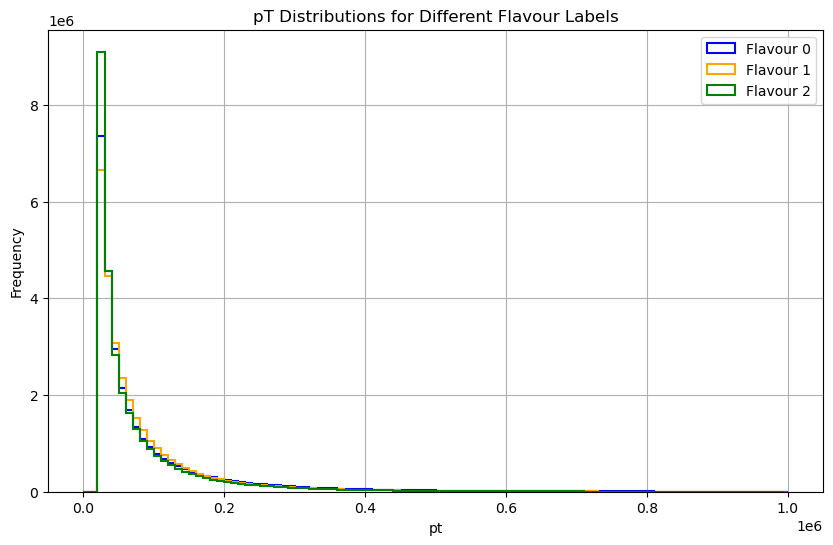

In [5]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

file_path = "/global/cfs/cdirs/atlas/jmw464/nishank_pi2/upp_samples/90M_wjets/output/pp_output_train.h5"

# Load the data
with h5py.File(file_path, 'r') as f:
    jets_dataset = f['jets']
    pt = jets_dataset['pt']
    flavour_label = jets_dataset['flavour_label']

# Unique flavour labels
unique_flavours = np.unique(flavour_label)

# Define colors for each flavour
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

# Plot histograms
plt.figure(figsize=(10, 6))

for i, flavour in enumerate(unique_flavours):
    flavour_mask = flavour_label == flavour
    plt.hist(pt[flavour_mask], bins=100, range=(0, 1e6), alpha=1, label=f'Flavour {flavour}', 
             histtype='step', linewidth=1.5, edgecolor=colors[i % len(colors)])

plt.xlabel('pt')
plt.ylabel('Frequency')
plt.title('pT Distributions for Different Flavour Labels')
plt.legend()
plt.grid(True)
plt.show()

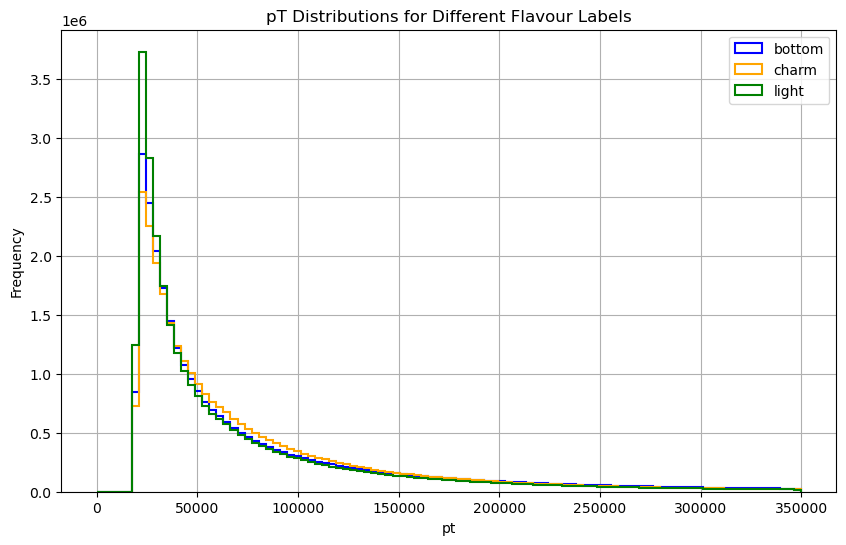

In [8]:
# Plot histograms
plt.figure(figsize=(10, 6))

for i, flavour in enumerate(unique_flavours):
    flavour_mask = flavour_label == flavour
    if flavour == 0:
        plt.hist(pt[flavour_mask], bins=100, range=(0,350000), alpha=1, label=f'bottom', 
                 histtype='step', linewidth=1.5, edgecolor=colors[i % len(colors)])
    if flavour == 1:
        plt.hist(pt[flavour_mask], bins=100, range=(0,350000), alpha=1, label=f'charm', 
                 histtype='step', linewidth=1.5, edgecolor=colors[i % len(colors)])
    if flavour == 2:
        plt.hist(pt[flavour_mask], bins=100, range=(0,350000), alpha=1, label=f'light', 
                 histtype='step', linewidth=1.5, edgecolor=colors[i % len(colors)])

plt.xlabel('pt')
plt.ylabel('Frequency')
plt.title('pT Distributions for Different Flavour Labels')
plt.legend()
plt.grid(True)
plt.show()

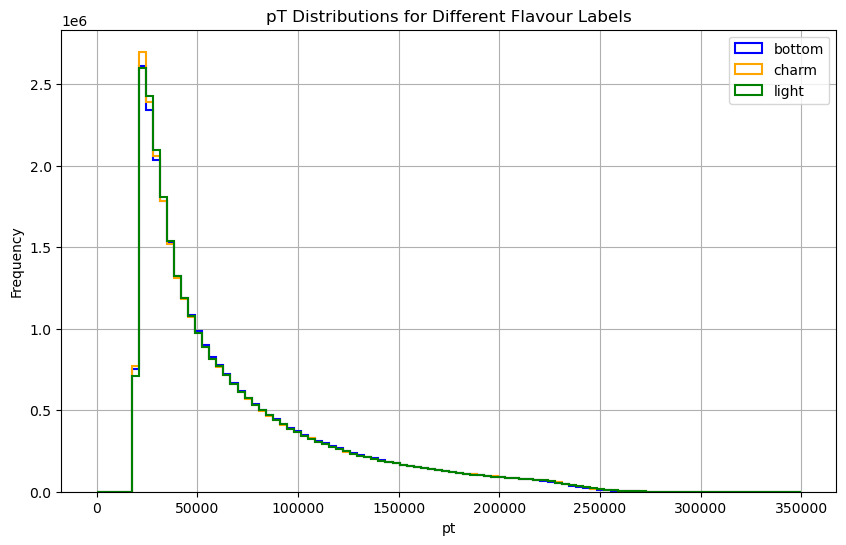

In [9]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

file_path = "/global/cfs/cdirs/atlas/jmw464/nishank_pi2/upp_samples/90M_wjets_resamp/output/pp_output_train.h5"

# Load the data
with h5py.File(file_path, 'r') as f:
    jets_dataset = f['jets']
    pt = jets_dataset['pt']
    flavour_label = jets_dataset['flavour_label']

# Unique flavour labels
unique_flavours = np.unique(flavour_label)

# Define colors for each flavour
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

# Plot histograms
plt.figure(figsize=(10, 6))

for i, flavour in enumerate(unique_flavours):
    flavour_mask = flavour_label == flavour
    if flavour == 0:
        plt.hist(pt[flavour_mask], bins=100, range=(0,350000), alpha=1, label=f'bottom', 
                 histtype='step', linewidth=1.5, edgecolor=colors[i % len(colors)])
    if flavour == 1:
        plt.hist(pt[flavour_mask], bins=100, range=(0,350000), alpha=1, label=f'charm', 
                 histtype='step', linewidth=1.5, edgecolor=colors[i % len(colors)])
    if flavour == 2:
        plt.hist(pt[flavour_mask], bins=100, range=(0,350000), alpha=1, label=f'light', 
                 histtype='step', linewidth=1.5, edgecolor=colors[i % len(colors)])

plt.xlabel('pt')
plt.ylabel('Frequency')
plt.title('pT Distributions for Different Flavour Labels')
plt.legend()
plt.grid(True)
plt.show()

In [2]:
import h5py
import numpy as np

# Paths to the .h5 files
file_paths = [
    '/global/cfs/cdirs/atlas/jmw464/nishank_pi2/upp_samples/large_mu_sample/output/pp_output_test_wjets_mul.h5',
    '/global/cfs/cdirs/atlas/jmw464/nishank_pi2/upp_samples/large_mu_sample/output/pp_output_test_wjets_muc.h5',
    '/global/cfs/cdirs/atlas/jmw464/nishank_pi2/upp_samples/large_mu_sample/output/pp_output_test_wjets_mub.h5'
]


output_file_path = 'test_vds.h5'
groups = ['jets', 'tracks']

with h5py.File(output_file_path, 'w', libver='latest') as f_out:
    for group in groups:
        vsource_list = []
        for file_path in file_paths:
            with h5py.File(file_path, 'r') as f_in:
                src_ds = f_in[group]
                if isinstance(src_ds, h5py.Group):
                    for key in src_ds.keys():
                        data_shape = src_ds[key].shape
                        data_dtype = src_ds[key].dtype
                        vsource = h5py.VirtualSource(file_path, f'/{group}/{key}', shape=data_shape)
                        layout = h5py.VirtualLayout(shape=(len(file_paths) * data_shape[0],) + data_shape[1:], dtype=data_dtype)
                        layout[len(vsource_list) * data_shape[0]:(len(vsource_list) + 1) * data_shape[0]] = vsource
                        vsource_list.append(layout)
                elif isinstance(src_ds, h5py.Dataset):
                    data_shape = src_ds.shape
                    data_dtype = src_ds.dtype
                    vsource = h5py.VirtualSource(file_path, f'/{group}', shape=data_shape)
                    layout = h5py.VirtualLayout(shape=(len(file_paths) * data_shape[0],) + data_shape[1:], dtype=data_dtype)
                    layout[len(vsource_list) * data_shape[0]:(len(vsource_list) + 1) * data_shape[0]] = vsource
                    vsource_list.append(layout)
        for layout in vsource_list:
            f_out.create_virtual_dataset(f'/{group}', layout)


ValueError: Unable to synchronously create dataset (name already exists)

In [4]:
import h5py
import numpy as np

# Paths to the .h5 files
file_paths = [
    '/global/cfs/cdirs/atlas/jmw464/nishank_pi2/upp_samples/90M_wjets_new/output/pp_output_test_wjets_mul.h5',
    '/global/cfs/cdirs/atlas/jmw464/nishank_pi2/upp_samples/90M_wjets_new/output/pp_output_test_wjets_muc.h5',
    '/global/cfs/cdirs/atlas/jmw464/nishank_pi2/upp_samples/90M_wjets_new/output/pp_output_test_wjets_mub.h5'
]

output_file_path = 'test_vds.h5'
groups = ['jets', 'tracks']

with h5py.File(output_file_path, 'w', libver='latest') as f_out:
    for group in groups:
        for file_path in file_paths:
            with h5py.File(file_path, 'r') as f_in:
                src_ds = f_in[group]
                if isinstance(src_ds, h5py.Group):
                    for key in src_ds.keys():
                        data_shape = src_ds[key].shape
                        data_dtype = src_ds[key].dtype
                        vsource = h5py.VirtualSource(file_path, f'/{group}/{key}', shape=data_shape)
                        layout_shape = (len(file_paths) * data_shape[0],) + data_shape[1:]
                        layout = h5py.VirtualLayout(shape=layout_shape, dtype=data_dtype)
                        start_idx = file_paths.index(file_path) * data_shape[0]
                        end_idx = start_idx + data_shape[0]
                        layout[start_idx:end_idx, ...] = vsource
                        if f'/{group}/{key}' not in f_out:
                            f_out.create_virtual_dataset(f'/{group}/{key}', layout)
                elif isinstance(src_ds, h5py.Dataset):
                    data_shape = src_ds.shape
                    data_dtype = src_ds.dtype
                    vsource = h5py.VirtualSource(file_path, f'/{group}', shape=data_shape)
                    layout_shape = (len(file_paths) * data_shape[0],) + data_shape[1:]
                    layout = h5py.VirtualLayout(shape=layout_shape, dtype=data_dtype)
                    start_idx = file_paths.index(file_path) * data_shape[0]
                    end_idx = start_idx + data_shape[0]
                    layout[start_idx:end_idx, ...] = vsource
                    if f'/{group}' not in f_out:
                        f_out.create_virtual_dataset(f'/{group}', layout)

print("Virtual datasets created in 'test_vds.h5'.")


Virtual datasets created in 'test_vds.h5'.


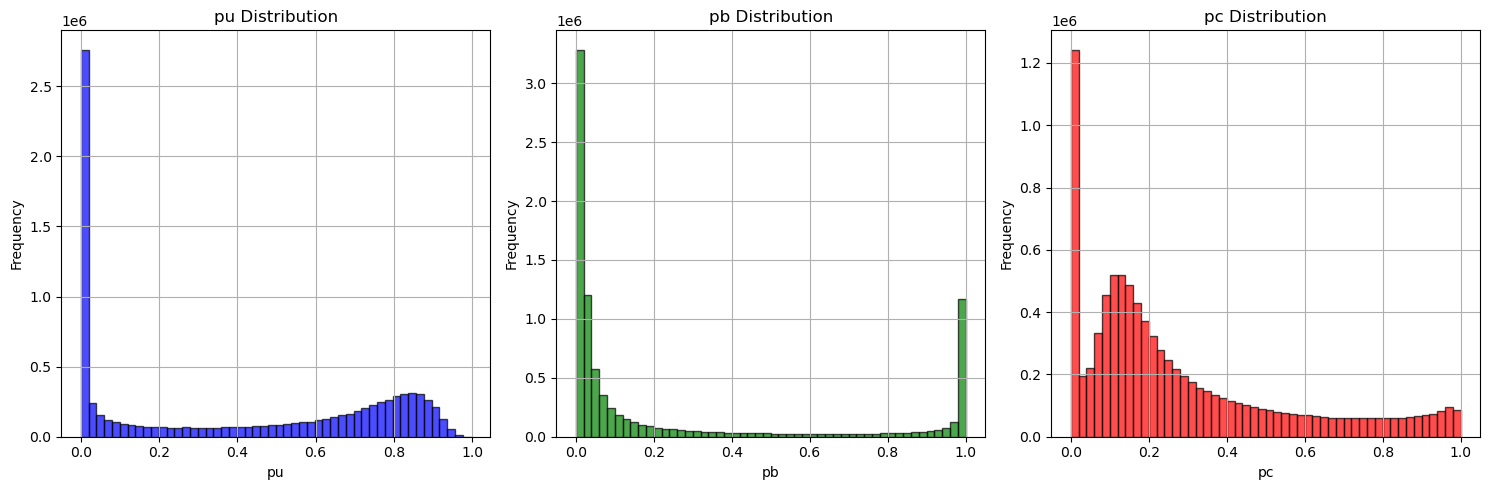

In [3]:
import h5py
import matplotlib.pyplot as plt

# Path to the .h5 file
#file_path = '/pscratch/sd/n/nishank/shapiro_pi2/salt/logs/GN2_20240701-T041601/ckpts/epoch=037-val_loss=0.60887__test_correct.h5'
file_path = '/pscratch/sd/n/nishank/shapiro_pi2/GN2_fold0_20240226-T063759/ckpts/epoch=034-val_loss=0.57278__test_large.h5'
# Open the .h5 file and read the score distributions
with h5py.File(file_path, 'r') as file:
    pu_data = file['jets']['GN2_fold0_pu'][:]
    pb_data = file['jets']['GN2_fold0_pb'][:]
    pc_data = file['jets']['GN2_fold0_pc'][:]
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(pu_data, bins=50, edgecolor='k', alpha=0.7, color='blue')
plt.xlabel('pu')
plt.ylabel('Frequency')
plt.title('pu Distribution')
plt.grid(True)
plt.subplot(1, 3, 2)
plt.hist(pb_data, bins=50, edgecolor='k', alpha=0.7, color='green')
plt.xlabel('pb')
plt.ylabel('Frequency')
plt.title('pb Distribution')
plt.grid(True)
plt.subplot(1, 3, 3)
plt.hist(pc_data, bins=50, edgecolor='k', alpha=0.7, color='red')
plt.xlabel('pc')
plt.ylabel('Frequency')
plt.title('pc Distribution')
plt.grid(True)
plt.tight_layout()
plt.show()


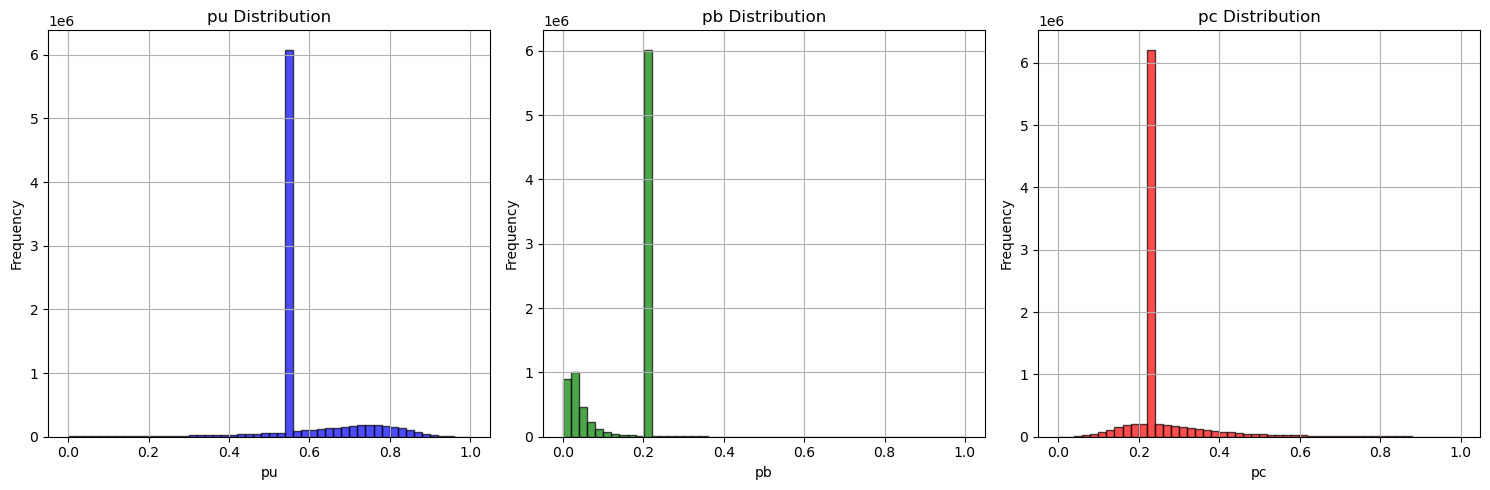

In [4]:
import h5py
import matplotlib.pyplot as plt

# Path to the .h5 file
file_path = '/pscratch/sd/n/nishank/shapiro_pi2/salt/logs/GN2_20240701-T041601/ckpts/epoch=037-val_loss=0.60887__test_correct.h5'
#file_path = '/pscratch/sd/n/nishank/shapiro_pi2/GN2_fold0_20240226-T063759/ckpts/epoch=034-val_loss=0.57278__test_large.h5'
# Open the .h5 file and read the score distributions
with h5py.File(file_path, 'r') as file:
    pu_data = file['jets']['GN2_pu'][:]
    pb_data = file['jets']['GN2_pb'][:]
    pc_data = file['jets']['GN2_pc'][:]
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(pu_data, bins=50, edgecolor='k', alpha=0.7, color='blue')
plt.xlabel('pu')
plt.ylabel('Frequency')
plt.title('pu Distribution')
plt.grid(True)
plt.subplot(1, 3, 2)
plt.hist(pb_data, bins=50, edgecolor='k', alpha=0.7, color='green')
plt.xlabel('pb')
plt.ylabel('Frequency')
plt.title('pb Distribution')
plt.grid(True)
plt.subplot(1, 3, 3)
plt.hist(pc_data, bins=50, edgecolor='k', alpha=0.7, color='red')
plt.xlabel('pc')
plt.ylabel('Frequency')
plt.title('pc Distribution')
plt.grid(True)
plt.tight_layout()
plt.show()


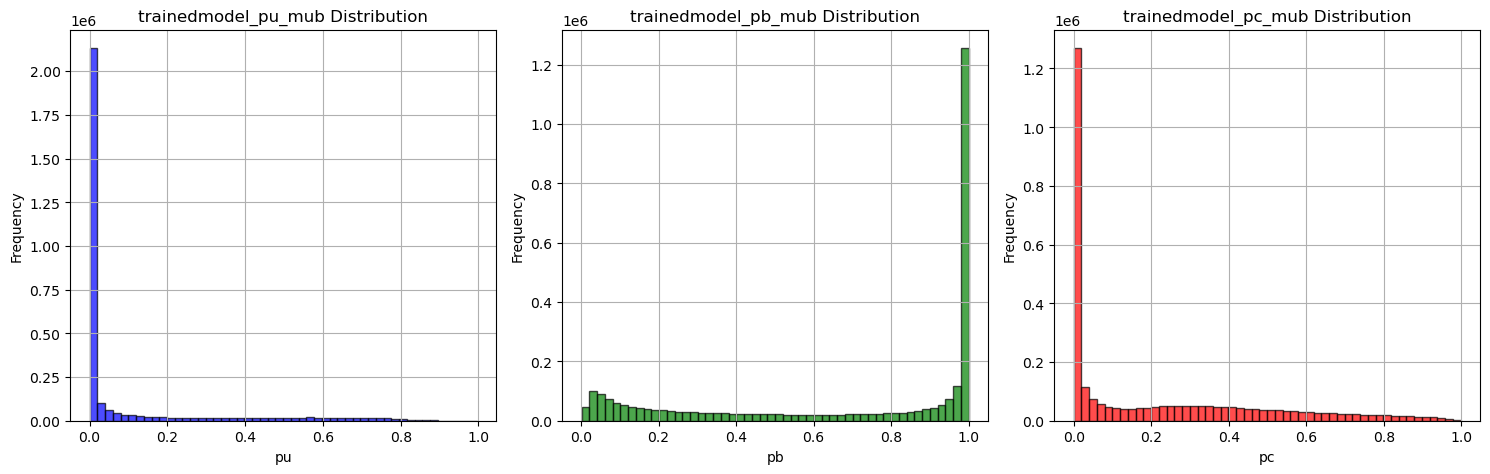

In [6]:
import h5py
import matplotlib.pyplot as plt

# Path to the .h5 file
#file_path = '/pscratch/sd/n/nishank/shapiro_pi2/salt/logs/GN2_20240701-T041601/ckpts/epoch=037-val_loss=0.60887__test_correct.h5'
file_path = '/pscratch/sd/n/nishank/shapiro_pi2/salt/logs/GN2_20240701-T041601/ckpts/epoch=037-val_loss=0.60887__test_pp_output_test_wjets_mub.h5'
#file_path = '/pscratch/sd/n/nishank/shapiro_pi2/GN2_fold0_20240226-T063759/ckpts/epoch=034-val_loss=0.57278__test_correct.h5'
# Open the .h5 file and read the score distributions
with h5py.File(file_path, 'r') as file:
    pu_data = file['jets']['GN2_pu'][:]
    pb_data = file['jets']['GN2_pb'][:]
    pc_data = file['jets']['GN2_pc'][:]
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(pu_data, bins=50, edgecolor='k', alpha=0.7, color='blue')
plt.xlabel('pu')
plt.ylabel('Frequency')
plt.title('trainedmodel_pu_mub Distribution')
plt.grid(True)
plt.subplot(1, 3, 2)
plt.hist(pb_data, bins=50, edgecolor='k', alpha=0.7, color='green')
plt.xlabel('pb')
plt.ylabel('Frequency')
plt.title('trainedmodel_pb_mub Distribution')
plt.grid(True)
plt.subplot(1, 3, 3)
plt.hist(pc_data, bins=50, edgecolor='k', alpha=0.7, color='red')
plt.xlabel('pc')
plt.ylabel('Frequency')
plt.title('trainedmodel_pc_mub Distribution')
plt.grid(True)
plt.tight_layout()
plt.show()


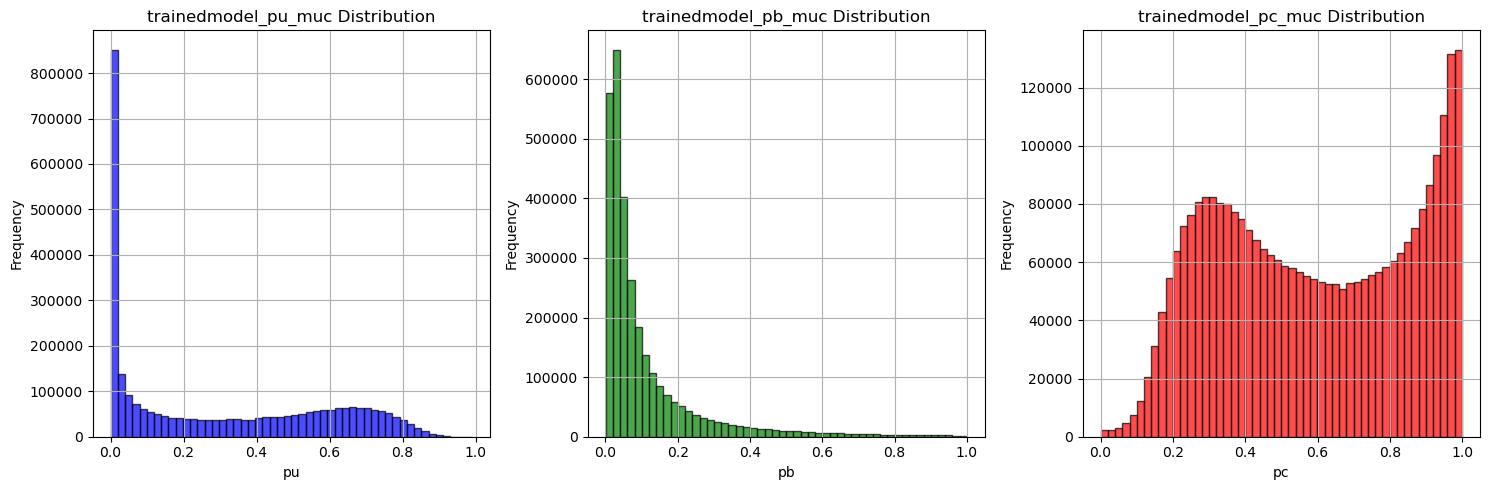

In [5]:
import h5py
import matplotlib.pyplot as plt

# Path to the .h5 file
#file_path = '/pscratch/sd/n/nishank/shapiro_pi2/salt/logs/GN2_20240701-T041601/ckpts/epoch=037-val_loss=0.60887__test_correct.h5'
file_path = '/pscratch/sd/n/nishank/shapiro_pi2/salt/logs/GN2_20240701-T041601/ckpts/epoch=037-val_loss=0.60887__test_pp_output_test_wjets_muc.h5'
#file_path = '/pscratch/sd/n/nishank/shapiro_pi2/GN2_fold0_20240226-T063759/ckpts/epoch=034-val_loss=0.57278__test_correct.h5'
# Open the .h5 file and read the score distributions
with h5py.File(file_path, 'r') as file:
    pu_data = file['jets']['GN2_pu'][:]
    pb_data = file['jets']['GN2_pb'][:]
    pc_data = file['jets']['GN2_pc'][:]
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(pu_data, bins=50, edgecolor='k', alpha=0.7, color='blue')
plt.xlabel('pu')
plt.ylabel('Frequency')
plt.title('trainedmodel_pu_muc Distribution')
plt.grid(True)
plt.subplot(1, 3, 2)
plt.hist(pb_data, bins=50, edgecolor='k', alpha=0.7, color='green')
plt.xlabel('pb')
plt.ylabel('Frequency')
plt.title('trainedmodel_pb_muc Distribution')
plt.grid(True)
plt.subplot(1, 3, 3)
plt.hist(pc_data, bins=50, edgecolor='k', alpha=0.7, color='red')
plt.xlabel('pc')
plt.ylabel('Frequency')
plt.title('trainedmodel_pc_muc Distribution')
plt.grid(True)
plt.tight_layout()
plt.show()


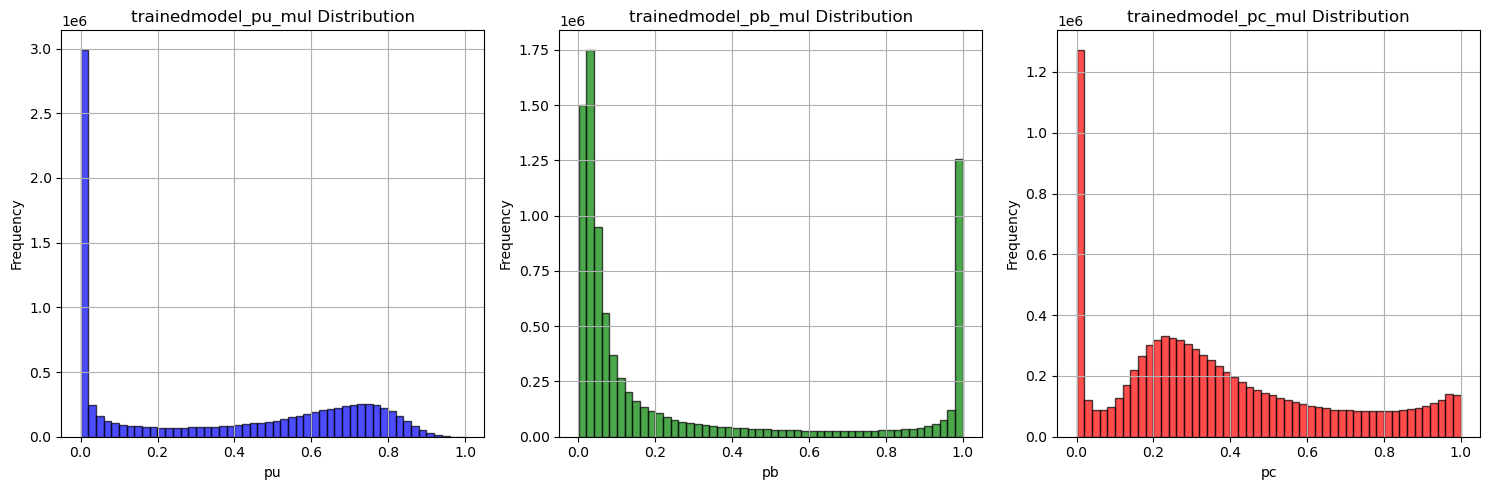

In [6]:
import h5py
import matplotlib.pyplot as plt

# Path to the .h5 file
#file_path = '/pscratch/sd/n/nishank/shapiro_pi2/salt/logs/GN2_20240701-T041601/ckpts/epoch=037-val_loss=0.60887__test_correct.h5'
file_path = '/pscratch/sd/n/nishank/shapiro_pi2/salt/logs/GN2_20240701-T041601/ckpts/epoch=037-val_loss=0.60887__test_combined_output.h5'
#file_path = '/pscratch/sd/n/nishank/shapiro_pi2/GN2_fold0_20240226-T063759/ckpts/epoch=034-val_loss=0.57278__test_correct.h5'
#file_path = '/pscratch/sd/n/nishank/shapiro_pi2/salt/logs/GN2_20240630-T040612/ckpts/epoch=028-val_loss=0.60921__test_combined_output.h5'
# Open the .h5 file and read the score distributions
with h5py.File(file_path, 'r') as file:
    pu_data = file['jets']['GN2_pu'][:]
    pb_data = file['jets']['GN2_pb'][:]
    pc_data = file['jets']['GN2_pc'][:]
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(pu_data, bins=50, edgecolor='k', alpha=0.7, color='blue')
plt.xlabel('pu')
plt.ylabel('Frequency')
plt.title('trainedmodel_pu_mul Distribution')
plt.grid(True)
plt.subplot(1, 3, 2)
plt.hist(pb_data, bins=50, edgecolor='k', alpha=0.7, color='green')
plt.xlabel('pb')
plt.ylabel('Frequency')
plt.title('trainedmodel_pb_mul Distribution')
plt.grid(True)
plt.subplot(1, 3, 3)
plt.hist(pc_data, bins=50, edgecolor='k', alpha=0.7, color='red')
plt.xlabel('pc')
plt.ylabel('Frequency')
plt.title('trainedmodel_pc_mul Distribution')
plt.grid(True)
plt.tight_layout()
plt.show()


In [5]:
file_path = '/pscratch/sd/n/nishank/shapiro_pi2/salt/logs/GN2_20240701-T041601/ckpts/epoch=037-val_loss=0.60887__test_pp_output_test_wjets_mub.h5'
with h5py.File(file_path, 'r') as file:
    #print(file["tracks"].dtype)
    print(file["tracks"]["SV1VertexIndex"][0:15,:])

[[-2 -2 -2 ... -1 -1 -1]
 [-2 -2 -2 ... -1 -1 -1]
 [-2 -2 -2 ... -1 -1 -1]
 ...
 [-2 -2 -2 ... -1 -1 -1]
 [-2 -2 -2 ... -1 -1 -1]
 [-2 -2 -2 ... -1 -1 -1]]


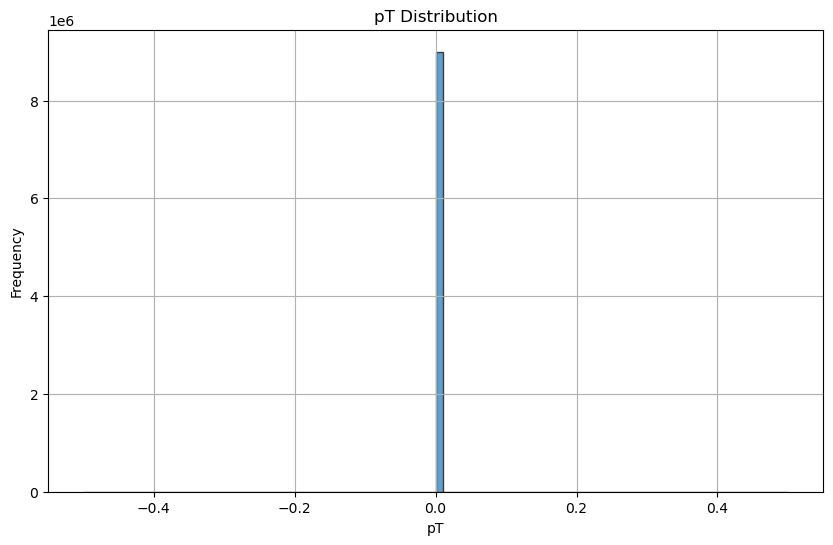

In [1]:
import h5py
import matplotlib.pyplot as plt

file_path = '/pscratch/sd/n/nishank/shapiro_pi2/bvsc_data/new_test.h5'

# Open the .h5 file
with h5py.File(file_path, 'r') as file:
    # Access the pt data
    raw_pt_data = file["jets"]["pt"][:]
    #raw_pt_data_2 = file["jets"]["pt"][:]
# Plot the pt distribution
plt.figure(figsize=(10, 6))
plt.hist(raw_pt_data, bins=100, edgecolor='k', alpha=0.7)
plt.xlabel('pT')
plt.ylabel('Frequency')
plt.title('pT Distribution')
plt.grid(True)  # Save the plot as a .png file
plt.show()

# plt.clf()
# plt.figure(figsize=(10, 6))
# plt.hist(raw_pt_data_2, bins=100, edgecolor='k', alpha=0.7)
# plt.xlabel('pT')
# plt.ylabel('Frequency')
# plt.title('pT Distribution')
# plt.grid(True)  # Save the plot as a .png file
# plt.show()



In [20]:
import h5py
import numpy as np

# File paths
file_paths = [
    '/global/cfs/cdirs/atlas/jmw464/nishank_pi2/upp_samples/90M_wjets_new/output/pp_output_test_wjets_mul.h5',
    '/global/cfs/cdirs/atlas/jmw464/nishank_pi2/upp_samples/90M_wjets_new/output/pp_output_test_wjets_muc.h5',
    '/global/cfs/cdirs/atlas/jmw464/nishank_pi2/upp_samples/90M_wjets_new/output/pp_output_test_wjets_mub.h5'
]

# Output file path
output_file_path = '/pscratch/sd/n/nishank/shapiro_pi2/bvsc_data/90M_wjets_new_test.h5'

# Initialize lists to hold the data for concatenation
jets_data = []
tracks_data = []

# Read and store the data from each file
for file_path in file_paths:
    with h5py.File(file_path, 'r') as input_file:
        jets_data.append(input_file['jets'][:])
        tracks_data.append(input_file['tracks'][:])

# Concatenate the data
combined_jets = np.concatenate(jets_data, axis=0)
combined_tracks = np.concatenate(tracks_data, axis=0)

# Write the concatenated data to a new HDF5 file
with h5py.File(output_file_path, 'w') as output_file:
    output_file.create_dataset('jets', data=combined_jets)
    output_file.create_dataset('tracks', data=combined_tracks)

print("Files combined successfully into", output_file_path)


Files combined successfully into /pscratch/sd/n/nishank/shapiro_pi2/bvsc_data/90M_wjets_new_test.h5


In [ ]:
import h5py
import matplotlib.pyplot as plt

# Path to the .h5 file
#file_path = '/pscratch/sd/n/nishank/shapiro_pi2/salt/logs/GN2_20240701-T041601/ckpts/epoch=037-val_loss=0.60887__test_correct.h5'
file_path = '/pscratch/sd/n/nishank/shapiro_pi2/salt/logs/GN2_20240701-T041601/ckpts/epoch=037-val_loss=0.60887__test_pp_output_test_wjets_mul.h5'
#file_path = '/pscratch/sd/n/nishank/shapiro_pi2/GN2_fold0_20240226-T063759/ckpts/epoch=034-val_loss=0.57278__test_correct.h5'
output_file_path = '/pscratch/sd/n/nishank/shapiro_pi2/bvsc_data/combined_output.h5'
# Open the .h5 file and read the score distributions
with h5py.File(file_path, 'r') as file:
    pu_data = file['jets']['GN2_pu'][:]
    pb_data = file['jets']['GN2_pb'][:]
    pc_data = file['jets']['GN2_pc'][:]
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(pu_data, bins=50, edgecolor='k', alpha=0.7, color='blue')
plt.xlabel('pu')
plt.ylabel('Frequency')
plt.title('trainedmodel_pu_mul Distribution')
plt.grid(True)
plt.subplot(1, 3, 2)
plt.hist(pb_data, bins=50, edgecolor='k', alpha=0.7, color='green')
plt.xlabel('pb')
plt.ylabel('Frequency')
plt.title('trainedmodel_pb_mul Distribution')
plt.grid(True)
plt.subplot(1, 3, 3)
plt.hist(pc_data, bins=50, edgecolor='k', alpha=0.7, color='red')
plt.xlabel('pc')
plt.ylabel('Frequency')
plt.title('trainedmodel_pc_mul Distribution')
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

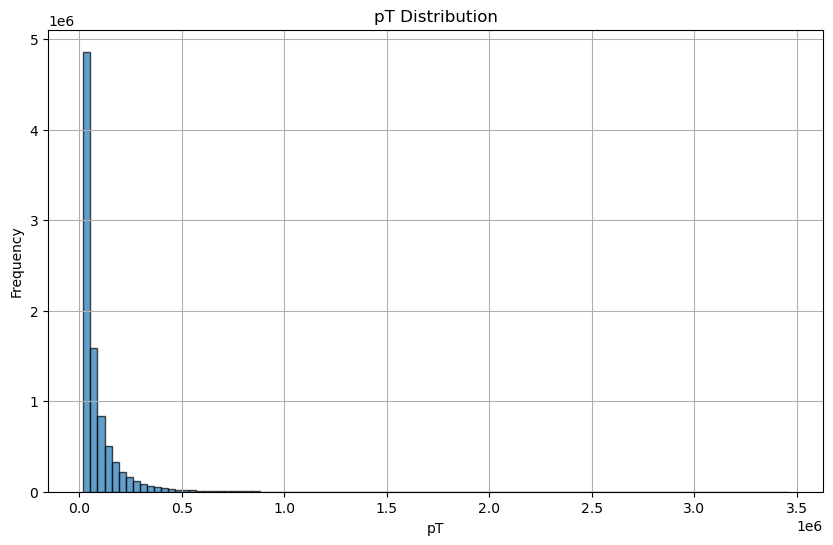

In [1]:
import h5py
import matplotlib.pyplot as plt

# Path to the .h5 file
#file_path = '/pscratch/sd/n/nishank/shapiro_pi2/salt/logs/GN2_20240701-T041601/ckpts/epoch=037-val_loss=0.60887__test_correct.h5'
#file_path = '/pscratch/sd/n/nishank/shapiro_pi2/GN2_fold0_20240226-T063759/ckpts/epoch=034-val_loss=0.57278__test_large.h5'
#file_path = '/global/cfs/cdirs/atlas/jmw464/nishank_pi2/upp_samples/large_mu_sample/output/pp_output_test_wjets_mul.h5'
#file_path = '/pscratch/sd/n/nishank/shapiro_pi2/bvsc_data/pp_output_test_correct.h5'
file_path = '/pscratch/sd/n/nishank/shapiro_pi2/bvsc_data/combined_output.h5'
#file_path = '/pscratch/sd/n/nishank/shapiro_pi2/bvsc_data/pp_output_test_large.h5'
# Open the .h5 file
with h5py.File(file_path, 'r') as file:
    # Access the pt data
    raw_pt_data = file["jets"]["pt"][:]
# Plot the pt distribution
plt.clf()
plt.figure(figsize=(10, 6))
plt.hist(raw_pt_data, bins=100, edgecolor='k', alpha=0.7)
plt.xlabel('pT')
plt.ylabel('Frequency')
plt.title('pT Distribution')
plt.grid(True)  # Save the plot as a .png file
plt.show()



/global/common/software/nersc/pe/conda-envs/24.1.0/python-3.11/nersc-python/lib/python3.11/site-packages/matplotlib/axes/_axes.py:6831: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/global/common/software/nersc/pe/conda-envs/24.1.0/python-3.11/nersc-python/lib/python3.11/site-packages/matplotlib/axes/_axes.py:6832: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


<Figure size 640x480 with 0 Axes>

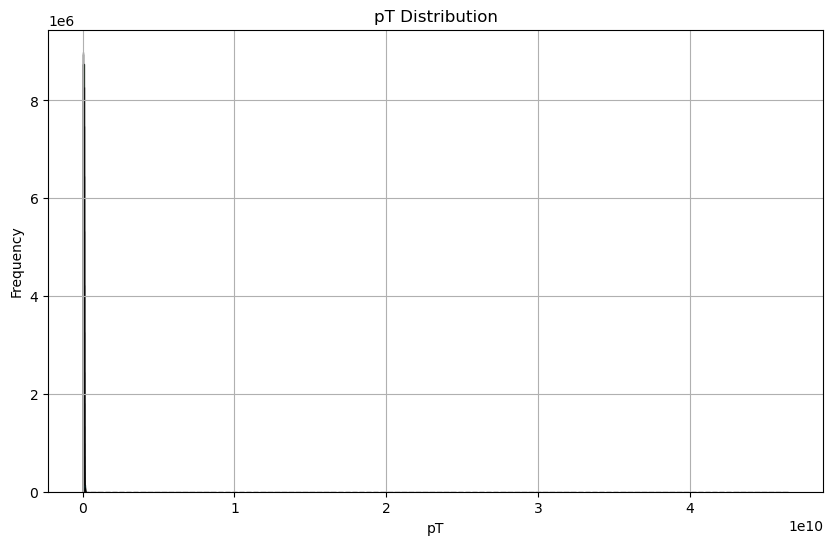

In [2]:
import h5py
import matplotlib.pyplot as plt

# Path to the .h5 file
#file_path = '/pscratch/sd/n/nishank/shapiro_pi2/salt/logs/GN2_20240701-T041601/ckpts/epoch=037-val_loss=0.60887__test_correct.h5'
#file_path = '/pscratch/sd/n/nishank/shapiro_pi2/GN2_fold0_20240226-T063759/ckpts/epoch=034-val_loss=0.57278__test_large.h5'
#file_path = '/global/cfs/cdirs/atlas/jmw464/nishank_pi2/upp_samples/large_mu_sample/output/pp_output_test_wjets_mul.h5'
#file_path = '/pscratch/sd/n/nishank/shapiro_pi2/bvsc_data/pp_output_test_correct.h5'
file_path = '/pscratch/sd/n/nishank/shapiro_pi2/bvsc_data/combined_output.h5'
#file_path = '/pscratch/sd/n/nishank/shapiro_pi2/bvsc_data/pp_output_test_large.h5'
# Open the .h5 file
with h5py.File(file_path, 'r') as file:
    # Access the pt data
    raw_pt_data = file["tracks"]["pt"][:]
# Plot the pt distribution
plt.clf()
plt.figure(figsize=(10, 6))
plt.hist(raw_pt_data, bins=100, edgecolor='k', alpha=0.7)
plt.xlabel('pT')
plt.ylabel('Frequency')
plt.title('pT Distribution')
plt.grid(True)  # Save the plot as a .png file
plt.show()